# 資料前處理

1.載入資料

In [ ]:
import pandas as pd
from google.colab import drive

# 授權 Colab 存取 Google 雲端硬碟
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/彰師大碩/機器學習期中/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv'

# 使用 pandas 讀取檔案
try:
    df = pd.read_csv(file_path)

    print(f"成功載入檔案: {file_path}")

    # 顯示前 5 筆資料，確認載入成功
    print("\n資料集前 5 筆預覽：")
    print(df.head())

    # 顯示資料集的欄位資訊
    print("\n資料集資訊 (欄位、型態、是否有缺失值)：")
    df.info()

except FileNotFoundError:
    print(f"\n錯誤：找不到檔案！")
    print(f"請確認您的檔案路徑是否正確: {file_path}")
except Exception as e:
    print(f"讀取檔案時發生錯誤: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
成功載入檔案: /content/drive/MyDrive/彰師大碩/機器學習期中/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv

資料集前 5 筆預覽：
   age  weight  height exercise  sleep sugar_intake smoking alcohol married  \
0   56      67     195      low    6.1       medium     yes     yes     yes   
1   69      76     170     high    6.9         high      no      no      no   
2   46     106     153     high    6.6          low     yes      no      no   
3   32      54     186   medium    8.5       medium      no      no      no   
4   60      98     195     high    8.0          low      no      no     yes   

      profession   bmi health_risk  
0  office_worker  17.6        high  
1        teacher  26.3        high  
2         artist  45.3        high  
3         artist  15.6         low  
4        teacher  25.8        high  

資料集資訊 (欄位、型態、是否有缺失值)：
<class 'pandas.core.frame.DataFrame'

2. EDA和編碼

--- 1. 目標變數 (health_risk) 分佈 ---
health_risk
high    3490
low     1510
Name: count, dtype: int64




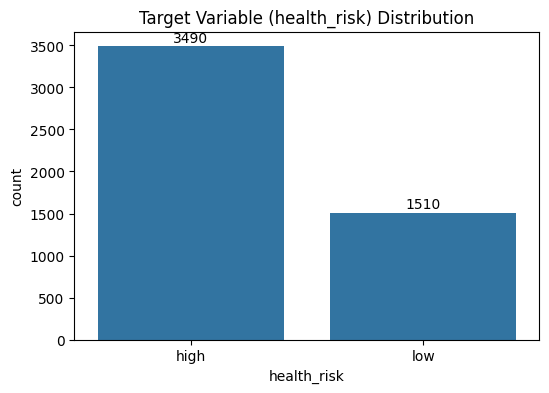

--- 2. 開始進行資料前處理 (Encoding) ---
已完成 'exercise' 和 'sugar_intake' 的順序編碼。
欄位 'smoking' 轉換 mapping: ['no' 'yes'] -> [0 1]
欄位 'alcohol' 轉換 mapping: ['no' 'yes'] -> [0 1]
欄位 'married' 轉換 mapping: ['no' 'yes'] -> [0 1]

已完成 'profession' 的 One-Hot Encoding。
目標欄位 'health_risk' 轉換 mapping: ['high' 'low'] -> [0 1]

--- 3. 資料前處理完成 ---
查看處理後的資料集 (前 5 筆):
   age  weight  height  exercise  sleep  sugar_intake  smoking  alcohol  \
0   56      67     195         1    6.1             1        1        1   
1   69      76     170         3    6.9             2        0        0   
2   46     106     153         3    6.6             0        1        0   
3   32      54     186         2    8.5             1        0        0   
4   60      98     195         3    8.0             0        0        0   

   married   bmi  health_risk  prof_artist  prof_doctor  prof_driver  \
0        1  17.6            0            0            0            0   
1        0  26.3            0            0            0      

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# --- 1. EDA - 檢查目標變數 (health_risk) 的分佈 ---
print("--- 1. 目標變數 (health_risk) 分佈 ---")
target_counts = df['health_risk'].value_counts()
print(target_counts)
print("\n")

# 視覺化
# 檢查資料是否平衡
plt.figure(figsize=(6, 4))
sns.countplot(x='health_risk', data=df)
plt.title('Target Variable (health_risk) Distribution')
# 在長條圖上顯示計數
for i, count in enumerate(target_counts):
    plt.text(i, count + 50, str(count), ha='center')
plt.show()

# --- 2. 資料前處理 - 編碼 (Encoding) ---
print("--- 2. 開始進行資料前處理 (Encoding) ---")

# 複製一份新的 DataFrame 進行處理，保留原始 df
df_processed = df.copy()

# A. 處理 "有序" 類別 (Ordinal Encoding)
exercise_map = {'none': 0, 'low': 1, 'medium': 2, 'high': 3}
sugar_map = {'low': 0, 'medium': 1, 'high': 2}

df_processed['exercise'] = df_processed['exercise'].map(exercise_map)
df_processed['sugar_intake'] = df_processed['sugar_intake'].map(sugar_map)
print("已完成 'exercise' 和 'sugar_intake' 的順序編碼。")

# B. 處理 "二元" 類別 (Label Encoding)
le = LabelEncoder()
binary_cols = ['smoking', 'alcohol', 'married']
for col in binary_cols:
    df_processed[col] = le.fit_transform(df_processed[col])
    print(f"欄位 '{col}' 轉換 mapping: {le.classes_} -> {le.transform(le.classes_)}")

# C. 處理 "無序" 類別 (One-Hot Encoding)
# (profession 欄位)
# pd.get_dummies 會自動刪除 'profession' 並添加新欄位
df_processed = pd.get_dummies(df_processed, columns=['profession'], prefix='prof', dtype=int)
print("\n已完成 'profession' 的 One-Hot Encoding。")

# D. 處理 "目標變數" (Target Encoding)
le_target = LabelEncoder()
df_processed['health_risk'] = le_target.fit_transform(df_processed['health_risk'])
print(f"目標欄位 'health_risk' 轉換 mapping: {le_target.classes_} -> {le_target.transform(le_target.classes_)}")

# --- 3. 檢視最終資料 ---
print("\n--- 3. 資料前處理完成 ---")
print("查看處理後的資料集 (前 5 筆):")
print(df_processed.head())

print("\n查看處理後的資料集資訊 (Dtypes):")
df_processed.info()

# 資料準備階段

1.切分資料集

In [ ]:
from sklearn.model_selection import train_test_split

# --- 1. 定義 X (特徵) 和 Y (目標) ---

# Y 是要預測的 'health_risk'
Y = df_processed['health_risk']

# X (特徵) 是 "除了 'health_risk' 以外的所有欄位"
X = df_processed.drop(columns=['health_risk'])

print("--- 1. 已定義 X (特徵) 和 Y (目標) ---")
print(f"X (特徵) 的維度: {X.shape}")
print(f"Y (目標) 的維度: {Y.shape}")
print("\n")


# --- 2. 切分訓練集 (Training) 和測試集 (Testing) ---

# 我們將資料 80% 用於訓練，20% 用於測試
# "分層抽樣";
# 由於資料不平衡，使用 stratify=Y 可以確保訓練集和測試集中的 'high'/'low' 比例 (70%/30%) 保持一致。
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,    # 測試集佔 20%
    random_state=42,  # 固定的隨機種子，確保每次執行結果都一樣
    stratify=Y        # 根據 Y (目標) 的比例來切分
)

print("--- 2. 已切分訓練集與測試集 ---")
print(f"X_train (訓練特徵) 維度: {X_train.shape}")
print(f"X_test (測試特徵) 維度: {X_test.shape}")
print(f"Y_train (訓練目標) 維度: {Y_train.shape}")
print(f"Y_test (測試目標) 維度: {Y_test.shape}")
print("\n")

# 驗證 'stratify' 是否生效
print("--- 3. 驗證分層抽樣 (Stratify) 結果 ---")
print("原始 Y (目標) 的分佈 (0:high, 1:low):")
print(Y.value_counts(normalize=True)) # normalize=True 顯示比例
print("\nY_train (訓練目標) 的分佈:")
print(Y_train.value_counts(normalize=True))
print("\nY_test (測試目標) 的分佈:")
print(Y_test.value_counts(normalize=True))
print("\n(比例應幾乎相同)")

--- 1. 已定義 X (特徵) 和 Y (目標) ---
X (特徵) 的維度: (5000, 18)
Y (目標) 的維度: (5000,)


--- 2. 已切分訓練集與測試集 ---
X_train (訓練特徵) 維度: (4000, 18)
X_test (測試特徵) 維度: (1000, 18)
Y_train (訓練目標) 維度: (4000,)
Y_test (測試目標) 維度: (1000,)


--- 3. 驗證分層抽樣 (Stratify) 結果 ---
原始 Y (目標) 的分佈 (0:high, 1:low):
health_risk
0    0.698
1    0.302
Name: proportion, dtype: float64

Y_train (訓練目標) 的分佈:
health_risk
0    0.698
1    0.302
Name: proportion, dtype: float64

Y_test (測試目標) 的分佈:
health_risk
0    0.698
1    0.302
Name: proportion, dtype: float64

(比例應幾乎相同)


2.特徵縮放

In [ ]:
from sklearn.preprocessing import MinMaxScaler

print("--- 1. 開始進行特徵縮放 (Scaling) ---")

# 建立一個 Scaler (縮放器)
scaler = MinMaxScaler()

# Scaler 去fit訓練集的尺度再transform訓練集
X_train_scaled = scaler.fit_transform(X_train)

# 使用從訓練集學到的尺度來transform測試集
X_test_scaled = scaler.transform(X_test)

# 將縮放後的 numpy 陣列轉換回 Pandas DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("--- 2. 縮放完成 ---")
print("查看 X_train 縮放後的結果 (前 5 筆):")
print(X_train_scaled_df.head())
print("\n")

print("查看 X_train 縮放後的統計資訊 (min/max):")
# .describe() 可以幫我們快速確認 min 都是 0, max 都是 1
print(X_train_scaled_df.describe())

--- 1. 開始進行特徵縮放 (Scaling) ---
--- 2. 縮放完成 ---
查看 X_train 縮放後的結果 (前 5 筆):
        age    weight    height  exercise     sleep  sugar_intake  smoking  \
0  0.803279  0.734375  0.611111  0.333333  0.557143           0.5      0.0   
1  0.262295  0.828125  0.722222  0.000000  0.300000           0.5      1.0   
2  0.213115  0.437500  0.870370  0.333333  0.228571           0.5      0.0   
3  0.098361  0.265625  0.240741  0.000000  0.600000           0.0      0.0   
4  0.098361  0.640625  0.018519  0.666667  0.571429           1.0      0.0   

   alcohol  married     bmi  prof_artist  prof_doctor  prof_driver  \
0      1.0      1.0  0.4400          0.0          0.0          0.0   
1      0.0      1.0  0.4375          0.0          0.0          1.0   
2      0.0      1.0  0.2100          0.0          1.0          0.0   
3      1.0      1.0  0.3350          0.0          0.0          0.0   
4      0.0      1.0  0.7225          0.0          0.0          0.0   

   prof_engineer  prof_farmer  prof_o

# 特徵選取-peason



1.pearson

--- 特徵選取 (1/5): ANOVA F-value (f_classif) ---
ANOVA F-value (f_classif) 特徵分數 (由高至低):
               Feature  f_classif_Score
0                  age       697.814606
9                  bmi       560.904517
1               weight       454.278396
6              smoking       268.796291
3             exercise       182.817994
2               height       132.969687
7              alcohol       125.655750
4                sleep        86.407188
5         sugar_intake        60.852913
12         prof_driver         3.861534
8              married         1.565198
11         prof_doctor         1.528461
10         prof_artist         0.823214
15  prof_office_worker         0.497366
17        prof_teacher         0.424054
13       prof_engineer         0.067701
16        prof_student         0.044003
14         prof_farmer         0.015708


--- 正在繪製特徵分數長條圖 ---


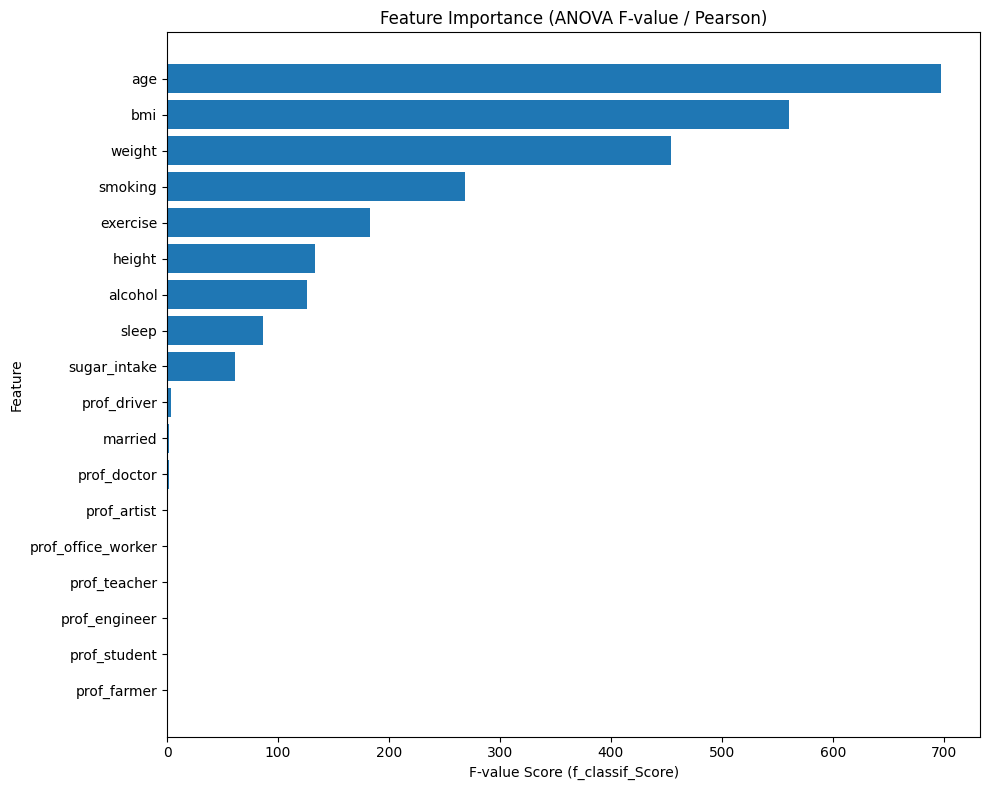

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

print("--- 特徵選取 (1/5): ANOVA F-value (f_classif) ---")

# --- 1. 計算分數 ---
# 取得所有特徵的名稱
feature_names = X_train_scaled_df.columns

# 建立 SelectKBest 物件，指定計分函數為 f_classif
fs_f_classif = SelectKBest(score_func=f_classif, k='all')# k='all' 表示先計算所有特徵的分數
fs_f_classif.fit(X_train_scaled_df, Y_train)

# --- 2. 建立分數總表 ---
pearson_scores_df = pd.DataFrame({
    'Feature': feature_names,
    'f_classif_Score': fs_f_classif.scores_
})

# 根據分數排序
pearson_scores_df = pearson_scores_df.sort_values(by='f_classif_Score', ascending=False)

print("ANOVA F-value (f_classif) 特徵分數 (由高至低):")
print(pearson_scores_df)
print("\n")

# --- 3. 繪製長條圖 (Bar Chart) ---
import matplotlib.pyplot as plt

# (設定中文字體，如果您的圖表需要顯示中文，才需要這段)
# (如果不需要，或是在 Colab 預設環境，可以跳過這兩行)
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # for Windows
# plt.rcParams['axes.unicode_minus'] = False # 解決負號顯示問題

print("--- 正在繪製特徵分數長條圖 ---")

# (設定圖表大小，寬 10, 高 8，適合 18 個特徵)
plt.figure(figsize=(10, 8))

# (建立水平長條圖)
# y 軸是特徵名稱, width (寬度) 是分數
plt.barh(pearson_scores_df['Feature'], pearson_scores_df['f_classif_Score'])

# (重要!) 反轉 Y 軸，讓分數最高的特徵顯示在最上面
plt.gca().invert_yaxis()

# (加上標題和標籤)
plt.title('Feature Importance (ANOVA F-value / Pearson)')
plt.xlabel('F-value Score (f_classif_Score)')
plt.ylabel('Feature')

# (自動調整版面，避免 Y 軸的特徵名稱被裁切)
plt.tight_layout()

# (顯示圖表)
plt.show()

跑DT

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
import time

# --- 1. 準備實驗參數 ---

# 8 次實驗設定
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個空的 list 來儲存 8 次的結果
dt_results = []

print("--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---")
print(f"--- 特徵選取法 (1/5): Pearson (f_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈，執行 8 次實驗 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (Pearson)"

        # 建立選擇器
        selector = SelectKBest(score_func=f_classif, k=k)

        # 重新 fit 訓練集 (因為 K 值改變了)
        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)

        # Transform 測試集
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 ---
    # 建立決策樹模型
    # 加入 class_weight='balanced' 來處理不平衡資料
    model_dt = DecisionTreeClassifier(
        random_state=42,          # 固定隨機種子，確保結果可重現
        # class_weight='balanced'   # 處理 70/30 的不平衡問題
    )

    # 訓練
    model_dt.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    # 預測
    Y_pred = model_dt.predict(X_test_run)

    # 計算 P, R, F1, Accuracy
    # 由於資料不平衡，主要看 'weighted avg' (加權平均)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'Decision Tree',
        'Feature Set': feature_set_name,
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': end_time - start_time
    }

    dt_results.append(result_dict)
    print(f"已完成: {feature_set_name} (耗時: {end_time - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_df = pd.DataFrame(dt_results)

print("\n--- 實驗結果：決策樹 + Pearson (f_classif) ---")
# 依照 K 值排序
print(results_df.sort_values(by='K', ascending=False, na_position='first'))

--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---
--- 特徵選取法 (1/5): Pearson (f_classif) ---
--- 正在執行 8 次實驗... ---
已完成: All Features (18) (耗時: 0.10 秒)
已完成: Top 10 Features (Pearson) (耗時: 0.05 秒)
已完成: Top 9 Features (Pearson) (耗時: 0.06 秒)
已完成: Top 8 Features (Pearson) (耗時: 0.07 秒)
已完成: Top 7 Features (Pearson) (耗時: 0.12 秒)
已完成: Top 6 Features (Pearson) (耗時: 0.09 秒)
已完成: Top 5 Features (Pearson) (耗時: 0.11 秒)
已完成: Top 4 Features (Pearson) (耗時: 0.10 秒)

--- 實驗結果：決策樹 + Pearson (f_classif) ---
           Model                Feature Set   K  Accuracy  \
0  Decision Tree          All Features (18)  18     0.996   
1  Decision Tree  Top 10 Features (Pearson)  10     0.996   
2  Decision Tree   Top 9 Features (Pearson)   9     0.997   
3  Decision Tree   Top 8 Features (Pearson)   8     0.936   
4  Decision Tree   Top 7 Features (Pearson)   7     0.873   
5  Decision Tree   Top 6 Features (Pearson)   6     0.848   
6  Decision Tree   Top 5 Features (Pearson)   5     0.859   
7  Decision Tree   Top 4 Feat

DT圖表


--- 視覺化圖表：K 值 vs. 模型效能 (簡易版) ---


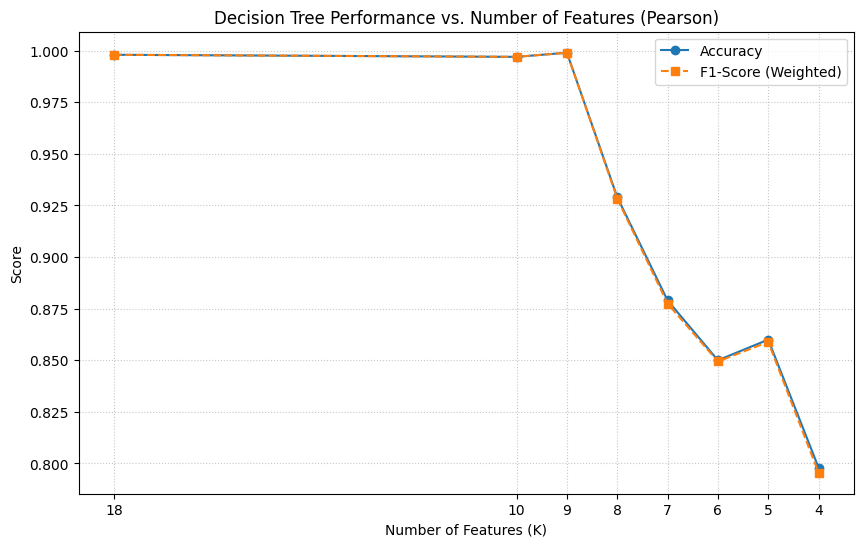


--- 實驗結果表格 (排序後) ---
        Model               Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Decision Tree         All Features (18) 18   0.99800               0.99800            0.99800              0.99800     0.04312
Decision Tree Top 10 Features (Pearson) 10   0.99700               0.99701            0.99700              0.99700     0.04164
Decision Tree  Top 9 Features (Pearson)  9   0.99900               0.99900            0.99900              0.99900     0.03590
Decision Tree  Top 8 Features (Pearson)  8   0.92900               0.92845            0.92900              0.92832     0.04113
Decision Tree  Top 7 Features (Pearson)  7   0.87900               0.87719            0.87900              0.87745     0.03843
Decision Tree  Top 6 Features (Pearson)  6   0.85000               0.84896            0.85000              0.84942     0.04876
Decision Tree  Top 5 Features (Pearson)  5   0.86000               0.85828            0.8

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- 1. 準備繪圖資料 ---
# 確保 K 是數字，並依照 K 降冪排序 (18, 10, 9... 4)
results_df['K'] = pd.to_numeric(results_df['K'])
results_df_sorted = results_df.sort_values(by='K', ascending=False)

# 獲取 K 值 (X 軸) 和分數 (Y 軸)
k_values = results_df_sorted['K']
accuracy_scores = results_df_sorted['Accuracy']
f1_scores = results_df_sorted['F1-Score (Weighted)']

# --- 2. 繪製簡單的線圖 ---
print("\n--- 視覺化圖表：K 值 vs. 模型效能 (簡易版) ---")

plt.figure(figsize=(10, 6))

# 繪製 Accuracy
plt.plot(k_values, accuracy_scores,
         label='Accuracy',
         marker='o', # 加上圓點
         linestyle='-') # 實線

# 繪製 F1-Score
plt.plot(k_values, f1_scores,
         label='F1-Score (Weighted)',
         marker='s', # 加上方塊
         linestyle='--') # 虛線

# --- 3. 美化圖表 ---
plt.title('Decision Tree Performance vs. Number of Features (Pearson)')
plt.xlabel('Number of Features (K)')
plt.ylabel('Score')

# (重要!) 設置 X 軸刻度為您指定的 K 值
plt.xticks(k_values)

# (重要!) 反轉 X 軸，讓 18 在左邊 (特徵多), 4 在右邊 (特徵少)
plt.gca().invert_xaxis()

plt.legend() # 顯示圖例 (Accuracy, F1-Score)
plt.grid(True, linestyle=':', alpha=0.7) # 加上淺色格線
plt.show()

# --- 4. 重新印出乾淨的表格 ---
print("\n--- 實驗結果表格 (排序後) ---")
# 使用 .to_string() 輸出簡單的純文字表格
print(results_df_sorted.to_string(index=False, float_format="%.5f"))

DT(0,1分別預測)

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 依然存在於您的 Colab 記憶體中)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]
dt_results_unbalanced = [] # (使用一個新的 list 儲存結果)

print("--- (B) 實驗 (DT - 無平衡): 決策樹 (Decision Tree) ---")
print(f"--- 特徵選取法 (1/5): Pearson (f_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (Pearson)"
        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (無 class_weight) ---
    model_dt = DecisionTreeClassifier(
        random_state=42,
        # class_weight='balanced' # (您故意註解掉的)
    )

    model_dt.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_dt.predict(X_test_run)

    # (重要!)
    # 1. output_dict=True 讓我們能提取 '0' 和 '1'
    # 2. zero_division=0 避免模型因從未預測 '1' 而報錯
    report = classification_report(Y_test, Y_pred, output_dict=True, zero_division=0)

    accuracy = accuracy_score(Y_test, Y_pred)

    # (舊) 提取加權平均
    f1_weighted = report['weighted avg']['f1-score']

    # (新) 提取 y=0 ('high') 的指標
    # '0' 是字典中的 key (字串)
    f1_0 = report['0']['f1-score']
    precision_0 = report['0']['precision']
    recall_0 = report['0']['recall']

    # (新) 提取 y=1 ('low') 的指標
    # '1' 是字典中的 key (字串)
    f1_1 = report['1']['f1-score']
    precision_1 = report['1']['precision']
    recall_1 = report['1']['recall']

    end_time = time.time()

    # --- D. 儲存結果 (!!! 修改點 !!!) ---
    # (已加入 Precision 欄位)
    result_dict = {
        'Model': 'Decision Tree (Unbalanced)',
        'K': k,
        'Accuracy (Global)': accuracy,          # (全局準確率)
        'F1-Score (Weighted)': f1_weighted,   # (整體 F1)

        'Precision (y=0 "high")': precision_0, # (y=0 的 Precision)
        'Recall (y=0 "high")': recall_0,       # (y=0 的 Recall)
        'F1-Score (y=0 "high")': f1_0,      # (y=0 的 F1)

        'Precision (y=1 "low")': precision_1, # (y=1 的 Precision)
        'Recall (y=1 "low")': recall_1,       # (y=1 的 Recall)
        'F1-Score (y=1 "low")': f1_1,       # (y=1 的 F1)

        'Time (sec)': time.time() - start_time
    }

    dt_results_unbalanced.append(result_dict)
    print(f"已完成: {feature_set_name} (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_unbalanced_df = pd.DataFrame(dt_results_unbalanced)

print("\n--- 實驗結果：決策樹 (無平衡) + Pearson (f_classif) ---")
# (使用 .to_string() 確保所有新欄位都被印出)
print(results_unbalanced_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (DT - 無平衡): 決策樹 (Decision Tree) ---
--- 特徵選取法 (1/5): Pearson (f_classif) ---
--- 正在執行 8 次實驗... ---
已完成: All Features (18) (耗時: 0.09 秒)
已完成: Top 10 Features (Pearson) (耗時: 0.04 秒)
已完成: Top 9 Features (Pearson) (耗時: 0.03 秒)
已完成: Top 8 Features (Pearson) (耗時: 0.04 秒)
已完成: Top 7 Features (Pearson) (耗時: 0.05 秒)
已完成: Top 6 Features (Pearson) (耗時: 0.08 秒)
已完成: Top 5 Features (Pearson) (耗時: 0.04 秒)
已完成: Top 4 Features (Pearson) (耗時: 0.05 秒)

--- 實驗結果：決策樹 (無平衡) + Pearson (f_classif) ---
                     Model  K  Accuracy (Global)  F1-Score (Weighted)  Precision (y=0 "high")  Recall (y=0 "high")  F1-Score (y=0 "high")  Precision (y=1 "low")  Recall (y=1 "low")  F1-Score (y=1 "low")  Time (sec)
Decision Tree (Unbalanced) 18            0.99600              0.99600                 0.99713              0.99713                0.99713                0.99338             0.99338               0.99338     0.08750
Decision Tree (Unbalanced) 10            0.99600              0.99600       

RF-bag

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個"新的" list 來儲存 RF 的結果
rf_results = []

print("--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---")
print(f"--- 特徵選取法 (1/5): Pearson (f_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈，執行 8 次實驗 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (Pearson)"

        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 RandomForest) ---
    # 同樣使用預設超參數
    model_rf = RandomForestClassifier(
        random_state=42,          # 固定隨機種子
        class_weight='balanced'   # 處理不平衡 (RF也支援)
    )

    model_rf.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_rf.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'Random Forest', # (更改模型名稱)
        'Feature Set': 'Pearson (f_classif)',
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': end_time - start_time
    }

    rf_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {end_time - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_rf_df = pd.DataFrame(rf_results)

print("\n--- 實驗結果：Random Forest + Pearson (f_classif) ---")
print(results_rf_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---
--- 特徵選取法 (1/5): Pearson (f_classif) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 1.50 秒)
已完成: K=10 (Top 10 Features (Pearson)) (耗時: 0.73 秒)
已完成: K=9 (Top 9 Features (Pearson)) (耗時: 0.61 秒)
已完成: K=8 (Top 8 Features (Pearson)) (耗時: 0.48 秒)
已完成: K=7 (Top 7 Features (Pearson)) (耗時: 0.50 秒)
已完成: K=6 (Top 6 Features (Pearson)) (耗時: 0.55 秒)
已完成: K=5 (Top 5 Features (Pearson)) (耗時: 0.53 秒)
已完成: K=4 (Top 4 Features (Pearson)) (耗時: 0.61 秒)

--- 實驗結果：Random Forest + Pearson (f_classif) ---
        Model         Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Random Forest Pearson (f_classif) 18   0.99500               0.99500            0.99500              0.99500     1.50374
Random Forest Pearson (f_classif) 10   0.99700               0.99700            0.99700              0.99700     0.72856
Random Forest Pearson (f_classif)  9   0.99700               0.99700            0.99

RF-Boost(XGBoost)

In [ ]:
# --- 0. 安裝 xgboost ---
# (Colab 預設可能沒有，我們先安裝)
!pip install xgboost

import pandas as pd
import xgboost as xgb # 匯入 xgboost
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
import time

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
xgb_results = []

# 計算不平衡權重
# 負類別 (0, 'high'): 3490
# 正類別 (1, 'low'): 1510
scale_pos_weight_value = 3490 / 1510
print(f"--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: {scale_pos_weight_value:.4f} ---")

print("\n--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---")
print(f"--- 特徵選取法 (1/5): Pearson (f_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (Pearson)"

        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 XGBClassifier) ---
    model_xgb = xgb.XGBClassifier(
        random_state=42,          # 固定隨機種子
        scale_pos_weight=scale_pos_weight_value, #處理不平衡
        use_label_encoder=False,  # 避免新版本 warning
        eval_metric='logloss'     # 避免新版本 warning
    )

    model_xgb.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_xgb.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'XGBoost', # (更改模型名稱)
        'Feature Set': 'Pearson (f_classif)',
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    xgb_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_xgb_df = pd.DataFrame(xgb_results)

print("\n--- 實驗結果：XGBoost + Pearson (f_classif) ---")
print(results_xgb_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: 2.3113 ---

--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---
--- 特徵選取法 (1/5): Pearson (f_classif) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.17 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:07:35] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:07:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:07:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=10 (Top 10 Features (Pearson)) (耗時: 0.09 秒)
已完成: K=9 (Top 9 Features (Pearson)) (耗時: 0.09 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:07:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:07:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=8 (Top 8 Features (Pearson)) (耗時: 0.11 秒)
已完成: K=7 (Top 7 Features (Pearson)) (耗時: 0.10 秒)
已完成: K=6 (Top 6 Features (Pearson)) (耗時: 0.10 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:07:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:07:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:07:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=5 (Top 5 Features (Pearson)) (耗時: 0.09 秒)
已完成: K=4 (Top 4 Features (Pearson)) (耗時: 0.09 秒)

--- 實驗結果：XGBoost + Pearson (f_classif) ---
  Model         Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
XGBoost Pearson (f_classif) 18   0.99900               0.99900            0.99900              0.99900     0.16586
XGBoost Pearson (f_classif) 10   0.99900               0.99900            0.99900              0.99900     0.09143
XGBoost Pearson (f_classif)  9   0.99900               0.99900            0.99900              0.99900     0.08944
XGBoost Pearson (f_classif)  8   0.95400               0.95618            0.95400              0.95448     0.11447
XGBoost Pearson (f_classif)  7   0.88900               0.89375            0.88900              0.89045     0.10140
XGBoost Pearson (f_classif)  6   0.85400               0.85585            0.85400              0.85479     0.09980
XGBoost Pearson (f_classif)  5   0.85100             

SVM

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
import time


# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
svm_results = []

print("--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---")
print(f"--- 特徵選取法 (1/5): Pearson (f_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗 (注意: SVM 速度較慢)... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (Pearson)"

        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 SVC) ---
    # 同樣使用預設超參數 (C=1.0, kernel='rbf')
    model_svm = SVC(
        random_state=42,          # 固定隨機種子
        class_weight='balanced'   # (重要!) 處理不平衡
    )

    model_svm.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_svm.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'SVM', # (更改模型名稱)
        'Feature Set': 'Pearson (f_classif)',
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    svm_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_svm_df = pd.DataFrame(svm_results)

print("\n--- 實驗結果：SVM + Pearson (f_classif) ---")
print(results_svm_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---
--- 特徵選取法 (1/5): Pearson (f_classif) ---
--- 正在執行 8 次實驗 (注意: SVM 速度較慢)... ---
已完成: K=18 (All Features (18)) (耗時: 1.26 秒)
已完成: K=10 (Top 10 Features (Pearson)) (耗時: 0.92 秒)
已完成: K=9 (Top 9 Features (Pearson)) (耗時: 1.05 秒)
已完成: K=8 (Top 8 Features (Pearson)) (耗時: 0.99 秒)
已完成: K=7 (Top 7 Features (Pearson)) (耗時: 0.89 秒)
已完成: K=6 (Top 6 Features (Pearson)) (耗時: 0.86 秒)
已完成: K=5 (Top 5 Features (Pearson)) (耗時: 0.46 秒)
已完成: K=4 (Top 4 Features (Pearson)) (耗時: 0.73 秒)

--- 實驗結果：SVM + Pearson (f_classif) ---
Model         Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  SVM Pearson (f_classif) 18   0.87300               0.88449            0.87300              0.87577     1.26278
  SVM Pearson (f_classif) 10   0.92300               0.92851            0.92300              0.92423     0.92024
  SVM Pearson (f_classif)  9   0.94000               0.94409            0.94000              0.94085    

MLP

In [ ]:
# --- 0. 安裝 imbalanced-learn (用於 SMOTE) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time
import warnings
from sklearn.exceptions import ConvergenceWarning

# (MLP 可能會因為迭代不夠而跳出 ConvergenceWarning，這在實驗中很常見)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
mlp_results = []

print("--- (B) 實驗 (5/6): MLP (Neural Network) ---")
print(f"--- 特徵選取法 (1/5): Pearson (f_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run_k = X_train_scaled_df
        X_test_run_k = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (Pearson)"

        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_run_k = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run_k = selector.transform(X_test_scaled_df)

    # --- B. (重要!) 執行 SMOTE ---
    # 建立 SMOTE 物件 (只在訓練集上執行)
    smote = SMOTE(random_state=42)
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

    # --- C. 訓練模型 (換成 MLPClassifier) ---
    # 使用預設超參數 (1 個 100 神經元的隱藏層)
    model_mlp = MLPClassifier(
        random_state=42,
        max_iter=500, # (增加迭代次數以確保收斂)
        hidden_layer_sizes=(50, 50)
    )

    # (注意!) fit 在 resampled (平衡) 過的資料上
    model_mlp.fit(X_train_resampled, Y_train_resampled)

    # --- D. 評估模型 ---
    # (注意!) predict 在 "原始" 的 X_test_run_k 上
    Y_pred = model_mlp.predict(X_test_run_k)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- E. 儲存結果 ---
    result_dict = {
        'Model': 'MLP', # (更改模型名稱)
        'Feature Set': 'Pearson (f_classif)',
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    mlp_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_mlp_df = pd.DataFrame(mlp_results)

print("\n--- 實驗結果：MLP + Pearson (f_classif) ---")
print(results_mlp_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (5/6): MLP (Neural Network) ---
--- 特徵選取法 (1/5): Pearson (f_classif) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 6.39 秒)
已完成: K=10 (Top 10 Features (Pearson)) (耗時: 5.57 秒)
已完成: K=9 (Top 9 Features (Pearson)) (耗時: 4.91 秒)
已完成: K=8 (Top 8 Features (Pearson)) (耗時: 3.77 秒)
已完成: K=7 (Top 7 Features (Pearson)) (耗時: 3.73 秒)
已完成: K=6 (Top 6 Features (Pearson)) (耗時: 3.72 秒)
已完成: K=5 (Top 5 Features (Pearson)) (耗時: 3.51 秒)
已完成: K=4 (Top 4 Features (Pearson)) (耗時: 4.21 秒)

--- 實驗結果：MLP + Pearson (f_classif) ---
Model         Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  MLP Pearson (f_classif) 18   0.92200               0.92146            0.92200              0.92162     6.39441
  MLP Pearson (f_classif) 10   0.96800               0.96815            0.96800              0.96806     5.56892
  MLP Pearson (f_classif)  9   0.96700               0.96760            0.96700              0.96716     4.91383
  MLP Pearson 

KNN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # (重要!) 匯入 kNN
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (SMOTE 函式庫應該還在)
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
knn_results = []

print("--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---")
print(f"--- 特徵選取法 (1/5): Pearson (f_classif) ---")
print(f"--- L 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run_k = X_train_scaled_df
        X_test_run_k = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (Pearson)"

        selector = SelectKBest(score_func=f_classif, k=k)
        X_train_run_k = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run_k = selector.transform(X_test_scaled_df)

    # --- B. (重要!) 執行 SMOTE ---
    # 建立 SMOTE 物件 (只在訓練集上執行)
    smote = SMOTE(random_state=42)
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

    # --- C. 訓練模型 (換成 KNeighborsClassifier) ---
    # 使用預設超參數 (n_neighbors=5)
    model_knn = KNeighborsClassifier(
        n_neighbors=5
    )

    # (注意!) fit 在 resampled (平衡) 過的資料上
    # kNN 的 fit 非常快，它只是 "背誦"
    model_knn.fit(X_train_resampled, Y_train_resampled)

    # --- D. 評估模型 ---
    # (注意!) predict 在 "原始" 的 X_test_run_k 上
    # kNN 的 predict 比較慢，它需要計算距離
    Y_pred = model_knn.predict(X_test_run_k)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- E. 儲存結果 ---
    result_dict = {
        'Model': 'kNN', # (更改模型名稱)
        'Feature Set': 'Pearson (f_classif)',
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    knn_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_knn_df = pd.DataFrame(knn_results)

print("\n--- 實驗結果：kNN + Pearson (f_classif) ---")
print(results_knn_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---
--- 特徵選取法 (1/5): Pearson (f_classif) ---
--- L 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.13 秒)
已完成: K=10 (Top 10 Features (Pearson)) (耗時: 0.15 秒)
已完成: K=9 (Top 9 Features (Pearson)) (耗時: 0.13 秒)
已完成: K=8 (Top 8 Features (Pearson)) (耗時: 0.10 秒)
已完成: K=7 (Top 7 Features (Pearson)) (耗時: 0.09 秒)
已完成: K=6 (Top 6 Features (Pearson)) (耗時: 0.08 秒)
已完成: K=5 (Top 5 Features (Pearson)) (耗時: 0.08 秒)
已完成: K=4 (Top 4 Features (Pearson)) (耗時: 0.17 秒)

--- 實驗結果：kNN + Pearson (f_classif) ---
Model         Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  kNN Pearson (f_classif) 18   0.83300               0.86022            0.83300              0.83839     0.12609
  kNN Pearson (f_classif) 10   0.92500               0.93045            0.92500              0.92620     0.14880
  kNN Pearson (f_classif)  9   0.93400               0.93862            0.93400              0.93498     0.12847
  kNN P

KNN 特徵TOP9 調整超參數

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 results_knn_df 是您上一步 kNN (uniform) 的結果 DataFrame)

# --- 1. 準備 K=9 的資料 (只做一次) ---
K = 9
print(f"--- 1. 準備 K={K} (Top {K} Features) 的資料集 ---")
selector = SelectKBest(score_func=f_classif, k=K)
X_train_k9 = selector.fit_transform(X_train_scaled_df, Y_train)
X_test_k9 = selector.transform(X_test_scaled_df)

print("--- 2. 對 K=9 訓練集執行 SMOTE ---")
smote = SMOTE(random_state=42)
X_train_resampled_k9, Y_train_resampled_k9 = smote.fit_resample(X_train_k9, Y_train)
print(f"SMOTE 完成：訓練資料從 {len(X_train_k9)} 筆 擴增至 {len(X_train_resampled_k9)} 筆 (50/50 平衡)")

# --- 3. 準備實驗參數 ---
n_neighbors_values = [3, 5, 7, 9] # 您指定的 k 值
knn_tuning_results = []

print(f"\n--- 3. (B) 實驗: kNN 超參數調校 (weights='distance') ---")
print(f"--- 正在執行 {len(n_neighbors_values)} 次實驗... ---")

# --- 4. 開始迴圈 ---
for k_value in n_neighbors_values:

    start_time = time.time()

    # --- A. 訓練模型 (使用 'distance' 權重) ---
    model_knn = KNeighborsClassifier(
        n_neighbors=k_value,
        weights='distance' # (重要!) 套用 'distance' 超參數
    )

    model_knn.fit(X_train_resampled_k9, Y_train_resampled_k9)

    # --- B. 評估模型 ---
    Y_pred = model_knn.predict(X_test_k9)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    # --- C. 儲存結果 ---
    result_dict = {
        'Model': 'kNN',
        'K_Features': K,
        'n_neighbors (k)': k_value,
        'weights': 'distance', # 記錄超參數
        'Accuracy': accuracy_score(Y_test, Y_pred),
        'F1-Score (Weighted)': report['weighted avg']['f1-score'],
        'Time (sec)': time.time() - start_time
    }
    knn_tuning_results.append(result_dict)
    print(f"  已完成: k={k_value}, weights='distance' (F1: {result_dict['F1-Score (Weighted)']:.5f})")

# --- 5. 組合 Baseline 和新結果 ---

# (A) 抓取您的 Baseline (K=9, k=5, weights='uniform')
try:
    baseline_k9_knn = results_knn_df[results_knn_df['K'] == 9].iloc[0].to_dict()
    # 整理成新表格的格式
    baseline_result = {
        'Model': 'kNN',
        'K_Features': 9,
        'n_neighbors (k)': 5, # 預設是 5
        'weights': 'uniform (Baseline)', # 預設是 'uniform'
        'Accuracy': baseline_k9_knn['Accuracy'],
        'F1-Score (Weighted)': baseline_k9_knn['F1-Score (Weighted)'],
        'Time (sec)': baseline_k9_knn['Time (sec)']
    }
    knn_tuning_results.append(baseline_result)
    print("\n已加入 Baseline (k=5, weights='uniform') 進行比較。")
except Exception as e:
    print(f"\n未找到 Baseline (results_knn_df) 資料，僅顯示新結果。 (錯誤: {e})")

# --- 6. 顯示最終比較表格 ---
final_tuning_knn_df = pd.DataFrame(knn_tuning_results)
final_tuning_knn_df = final_tuning_knn_df.sort_values(by='F1-Score (Weighted)', ascending=False)

print("\n--- 實驗結果：kNN 超參數調校 (K=9) ---")
print(final_tuning_knn_df.to_string(index=False, float_format="%.5f"))

--- 1. 準備 K=9 (Top 9 Features) 的資料集 ---
--- 2. 對 K=9 訓練集執行 SMOTE ---
SMOTE 完成：訓練資料從 4000 筆 擴增至 5584 筆 (50/50 平衡)

--- 3. (B) 實驗: kNN 超參數調校 (weights='distance') ---
--- 正在執行 4 次實驗... ---
  已完成: k=3, weights='distance' (F1: 0.93864)
  已完成: k=5, weights='distance' (F1: 0.93883)
  已完成: k=7, weights='distance' (F1: 0.93796)
  已完成: k=9, weights='distance' (F1: 0.93311)

已加入 Baseline (k=5, weights='uniform') 進行比較。

--- 實驗結果：kNN 超參數調校 (K=9) ---
Model  K_Features  n_neighbors (k)            weights  Accuracy  F1-Score (Weighted)  Time (sec)
  kNN           9                5           distance   0.93800              0.93883     0.04397
  kNN           9                3           distance   0.93800              0.93864     0.04098
  kNN           9                7           distance   0.93700              0.93796     0.06470
  kNN           9                5 uniform (Baseline)   0.93400              0.93498     0.12847
  kNN           9                9           distance   0.93200           

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 results_knn_df 是您上一步 kNN (uniform) 的結果 DataFrame)

# --- 1. 準備 K=9 的資料 (只做一次) ---
K = 9
print(f"--- 1. 準備 K={K} (Top {K} Features) 的資料集 ---")
selector = SelectKBest(score_func=f_classif, k=K)
X_train_k9 = selector.fit_transform(X_train_scaled_df, Y_train)
X_test_k9 = selector.transform(X_test_scaled_df)

print("--- 2. 對 K=9 訓練集執行 SMOTE ---")
smote = SMOTE(random_state=42)
X_train_resampled_k9, Y_train_resampled_k9 = smote.fit_resample(X_train_k9, Y_train)
print(f"SMOTE 完成：訓練資料從 {len(X_train_k9)} 筆 擴增至 {len(X_train_resampled_k9)} 筆 (50/50 平衡)")

# --- 3. 準備實驗參數 ---
n_neighbors_values = [3, 5, 7, 9] # 您指定的 k 值
knn_tuning_results = []

print(f"\n--- 3. (B) 實驗: kNN 超參數調校 (weights='distance') ---")
print(f"--- 正在執行 {len(n_neighbors_values)} 次實驗... ---")

# --- 4. 開始迴圈 ---
for k_value in n_neighbors_values:

    start_time = time.time()

    # --- A. 訓練模型 (使用 'distance' 權重) ---
    model_knn = KNeighborsClassifier(
        n_neighbors=k_value,
        weights='distance' # (重要!) 套用 'distance' 超參數
    )

    model_knn.fit(X_train_resampled_k9, Y_train_resampled_k9)

    # --- B. 評估模型 ---
    Y_pred = model_knn.predict(X_test_k9)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    # --- C. 儲存結果 (已補上 Precision 和 Recall) ---
    result_dict = {
        'Model': 'kNN',
        'K_Features': K,
        'n_neighbors (k)': k_value,
        'weights': 'distance',
        'Accuracy': accuracy_score(Y_test, Y_pred),
        'Precision (Weighted)': report['weighted avg']['precision'], # (已補上)
        'Recall (Weighted)': report['weighted avg']['recall'],     # (已補上)
        'F1-Score (Weighted)': report['weighted avg']['f1-score'],
        'Time (sec)': time.time() - start_time
    }
    knn_tuning_results.append(result_dict)
    print(f"  已完成: k={k_value}, weights='distance' (F1: {result_dict['F1-Score (Weighted)']:.5f})")

# --- 5. 組合 Baseline 和新結果 ---

# (A) 抓取您的 Baseline (K=9, k=5, weights='uniform')
try:
    baseline_k9_knn = results_knn_df[results_knn_df['K'] == 9].iloc[0].to_dict()
    # 整理成新表格的格式
    baseline_result = {
        'Model': 'kNN',
        'K_Features': 9,
        'n_neighbors (k)': 5, # 預設是 5
        'weights': 'uniform (Baseline)', # 預設是 'uniform'
        'Accuracy': baseline_k9_knn['Accuracy'],
        'Precision (Weighted)': baseline_k9_knn['Precision (Weighted)'], # (已補上)
        'Recall (Weighted)': baseline_k9_knn['Recall (Weighted)'],     # (已補上)
        'F1-Score (Weighted)': baseline_k9_knn['F1-Score (Weighted)'],
        'Time (sec)': baseline_k9_knn['Time (sec)']
    }
    knn_tuning_results.append(baseline_result)
    print("\n已加入 Baseline (k=5, weights='uniform') 進行比較。")
except Exception as e:
    print(f"\n未找到 Baseline (results_knn_df) 資料，僅顯示新結果。 (錯誤: {e})")

# --- 6. 顯示最終比較表格 ---
final_tuning_knn_df = pd.DataFrame(knn_tuning_results)

# (重要!) 調整顯示的欄位順序
columns_to_show = [
    'Model', 'K_Features', 'n_neighbors (k)', 'weights',
    'Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)', 'Time (sec)'
]
# 過濾掉可能不存在的欄位 (以防 baseline 抓取失敗)
final_columns = [col for col in columns_to_show if col in final_tuning_knn_df.columns]

final_tuning_knn_df = final_tuning_knn_df.sort_values(by='F1-Score (Weighted)', ascending=False)

print("\n--- 實驗結果：kNN 超參數調校 (K=9) [包含P/R] ---")
print(final_tuning_knn_df[final_columns].to_string(index=False, float_format="%.5f"))

--- 1. 準備 K=9 (Top 9 Features) 的資料集 ---
--- 2. 對 K=9 訓練集執行 SMOTE ---
SMOTE 完成：訓練資料從 4000 筆 擴增至 5584 筆 (50/50 平衡)

--- 3. (B) 實驗: kNN 超參數調校 (weights='distance') ---
--- 正在執行 4 次實驗... ---
  已完成: k=3, weights='distance' (F1: 0.93864)
  已完成: k=5, weights='distance' (F1: 0.93883)
  已完成: k=7, weights='distance' (F1: 0.93796)
  已完成: k=9, weights='distance' (F1: 0.93311)

已加入 Baseline (k=5, weights='uniform') 進行比較。

--- 實驗結果：kNN 超參數調校 (K=9) [包含P/R] ---
Model  K_Features  n_neighbors (k)            weights  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  kNN           9                5           distance   0.93800               0.94178            0.93800              0.93883     0.10062
  kNN           9                3           distance   0.93800               0.94049            0.93800              0.93864     0.06749
  kNN           9                7           distance   0.93700               0.94173            0.93700              0.93796     0.17442

# 特徵選取-infoGain

計算infoGain特徵分數

--- (A) 特徵選取 (2/5): infoGain (mutual_info_classif) ---
正在計算 infoGain (mutual_info_classif) 分數...
計算完成。

--- infoGain (mutual_info_classif) 特徵分數 (由高至低) ---
               Feature  infoGain_Score
0                  age        0.106928
9                  bmi        0.102582
1               weight        0.053423
6              smoking        0.035340
3             exercise        0.023888
5         sugar_intake        0.021845
16        prof_student        0.020759
2               height        0.013149
4                sleep        0.010660
7              alcohol        0.010654
15  prof_office_worker        0.007402
12         prof_driver        0.007295
17        prof_teacher        0.001317
8              married        0.000000
13       prof_engineer        0.000000
11         prof_doctor        0.000000
10         prof_artist        0.000000
14         prof_farmer        0.000000


--- 正在繪製特徵分數長條圖 ---


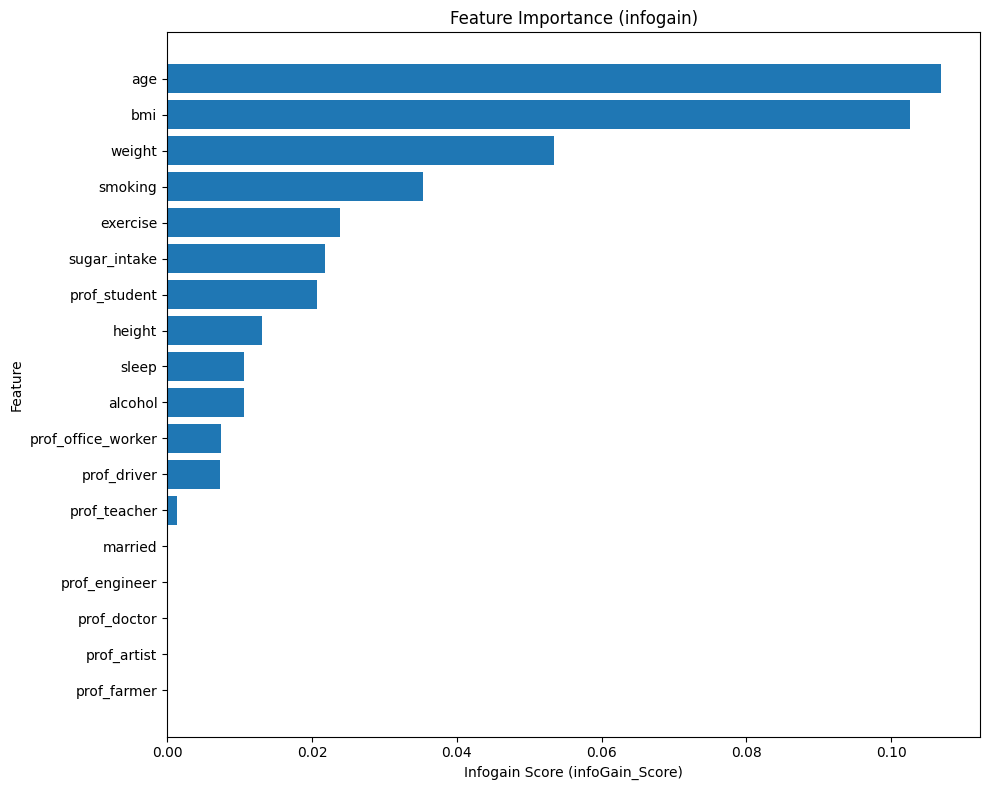

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# (假設 X_train_scaled_df 和 Y_train 依然存在於您的 Colab 記憶體中)

print("--- (A) 特徵選取 (2/5): infoGain (mutual_info_classif) ---")

# --- 1. 取得特徵名稱 ---
feature_names = X_train_scaled_df.columns

# --- 2. 計算 infoGain (互信息) 分數 ---
# mutual_info_classif 是一種基於 kNN 的估計法，
# 所以它具有隨機性，我們必須設定 random_state=42 來固定結果
print("正在計算 infoGain (mutual_info_classif) 分數...")
infogain_scores = mutual_info_classif(X_train_scaled_df, Y_train, random_state=42)
print("計算完成。")

# --- 3. 建立分數總表 (用於報告) ---
infogain_scores_df = pd.DataFrame({
    'Feature': feature_names,
    'infoGain_Score': infogain_scores
})

# 根據 infoGain 分數排序
infogain_scores_df = infogain_scores_df.sort_values(by='infoGain_Score', ascending=False)

print("\n--- infoGain (mutual_info_classif) 特徵分數 (由高至低) ---")
# 使用 .to_string() 來確保 18 個特徵全部被印出
print(infogain_scores_df.to_string())
print("\n")

# --- 4. 繪製長條圖 (Bar Chart) ---
import matplotlib.pyplot as plt

print("--- 正在繪製特徵分數長條圖 ---")

# (設定圖表大小，寬 10, 高 8，適合 18 個特徵)
plt.figure(figsize=(10, 8))

# (建立水平長條圖)
# y 軸是特徵名稱, width (寬度) 是分數
plt.barh(infogain_scores_df['Feature'], infogain_scores_df['infoGain_Score'])

# (重要!) 反轉 Y 軸，讓分數最高的特徵顯示在最上面
plt.gca().invert_yaxis()

# (加上標題和標籤)
plt.title('Feature Importance (infogain)')
plt.xlabel('Infogain Score (infoGain_Score)')
plt.ylabel('Feature')

# (自動調整版面，避免 Y 軸的特徵名稱被裁切)
plt.tight_layout()

# (顯示圖表)
plt.show()

DT

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score
import time
import functools # (我們需要這個工具來固定 random_state)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
dt_infogain_results = []

# (重要!)
# 建立一個 "固定 random_state" 的 infoGain 計分器
# 確保 SelectKBest 每次都選到一樣的特徵
infogain_scorer = functools.partial(mutual_info_classif, random_state=42)

print("--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---")
print(f"--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (infoGain)"

        # (重要!) 使用我們固定好的 infogain_scorer
        selector = SelectKBest(score_func=infogain_scorer, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 ---
    model_dt = DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    )

    model_dt.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_dt.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'Decision Tree',
        'Feature Set': 'infoGain', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    dt_infogain_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_dt_infogain_df = pd.DataFrame(dt_infogain_results)

print("\n--- 實驗結果：Decision Tree + infoGain ---")
print(results_dt_infogain_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---
--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.04 秒)
已完成: K=10 (Top 10 Features (infoGain)) (耗時: 0.63 秒)
已完成: K=9 (Top 9 Features (infoGain)) (耗時: 0.60 秒)
已完成: K=8 (Top 8 Features (infoGain)) (耗時: 0.57 秒)
已完成: K=7 (Top 7 Features (infoGain)) (耗時: 0.64 秒)
已完成: K=6 (Top 6 Features (infoGain)) (耗時: 0.40 秒)
已完成: K=5 (Top 5 Features (infoGain)) (耗時: 0.47 秒)
已完成: K=4 (Top 4 Features (infoGain)) (耗時: 0.35 秒)

--- 實驗結果：Decision Tree + infoGain ---
        Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Decision Tree    infoGain 18   0.99800               0.99800            0.99800              0.99800     0.04424
Decision Tree    infoGain 10   0.99900               0.99900            0.99900              0.99900     0.63468
Decision Tree    infoGain  9   0.93600               0.93560            0.93600              0.93569     0.6028

RF-bag

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # (重要!) 換成 RF
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score
import time
import functools # (我們需要這個工具來固定 random_state)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
rf_infogain_results = [] # (新的結果 list)

# (重要!)
# 建立一個 "固定 random_state" 的 infoGain 計分器
# 確保 SelectKBest 每次都選到一樣的特徵
infogain_scorer = functools.partial(mutual_info_classif, random_state=42)

print("--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---")
print(f"--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (infoGain)"

        # (重要!) 使用我們固定好的 infogain_scorer
        selector = SelectKBest(score_func=infogain_scorer, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 RandomForest) ---
    model_rf = RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    )

    model_rf.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_rf.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'Random Forest', # (更改模型名稱)
        'Feature Set': 'infoGain', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    rf_infogain_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_rf_infogain_df = pd.DataFrame(rf_infogain_results)

print("\n--- 實驗結果：Random Forest + infoGain ---")
print(results_rf_infogain_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---
--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.54 秒)
已完成: K=10 (Top 10 Features (infoGain)) (耗時: 0.85 秒)
已完成: K=9 (Top 9 Features (infoGain)) (耗時: 0.88 秒)
已完成: K=8 (Top 8 Features (infoGain)) (耗時: 0.80 秒)
已完成: K=7 (Top 7 Features (infoGain)) (耗時: 0.75 秒)
已完成: K=6 (Top 6 Features (infoGain)) (耗時: 0.78 秒)
已完成: K=5 (Top 5 Features (infoGain)) (耗時: 0.83 秒)
已完成: K=4 (Top 4 Features (infoGain)) (耗時: 0.92 秒)

--- 實驗結果：Random Forest + infoGain ---
        Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Random Forest    infoGain 18   0.99500               0.99500            0.99500              0.99500     0.54331
Random Forest    infoGain 10   0.99600               0.99600            0.99600              0.99600     0.85291
Random Forest    infoGain  9   0.94400               0.94534            0.94400              0.94440 

RF-boost(XGBoost)

In [ ]:
# --- 0. 安裝 xgboost (如果已安裝，會自動跳過) ---
!pip install xgboost

import pandas as pd
import xgboost as xgb # 匯入 xgboost
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score
import time
import functools # (我們需要這個工具來固定 random_state)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
xgb_infogain_results = [] # (新的結果 list)

# (重要!) 計算不平衡權重
# 負類別 (0, 'high'): 3490
# 正類別 (1, 'low'): 1510
scale_pos_weight_value = 3490 / 1510
print(f"--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: {scale_pos_weight_value:.4f} ---")

# (重要!)
# 建立一個 "固定 random_state" 的 infoGain 計分器
infogain_scorer = functools.partial(mutual_info_classif, random_state=42)

print("\n--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---")
print(f"--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (infoGain)"

        # (重要!) 使用我們固定好的 infogain_scorer
        selector = SelectKBest(score_func=infogain_scorer, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 XGBClassifier) ---
    model_xgb = xgb.XGBClassifier(
        random_state=42,          # 固定隨機種子
        scale_pos_weight=scale_pos_weight_value, # (重要!) 處理不平衡
        use_label_encoder=False,
        eval_metric='logloss'
    )

    model_xgb.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_xgb.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'XGBoost', # (更改模型名稱)
        'Feature Set': 'infoGain', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    xgb_infogain_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_xgb_infogain_df = pd.DataFrame(xgb_infogain_results)

print("\n--- 實驗結果：XGBoost + infoGain ---")
print(results_xgb_infogain_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: 2.3113 ---

--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---
--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.17 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=10 (Top 10 Features (infoGain)) (耗時: 0.47 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=9 (Top 9 Features (infoGain)) (耗時: 0.43 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:14] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=8 (Top 8 Features (infoGain)) (耗時: 0.42 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=7 (Top 7 Features (infoGain)) (耗時: 0.41 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=6 (Top 6 Features (infoGain)) (耗時: 0.42 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=5 (Top 5 Features (infoGain)) (耗時: 0.43 秒)
已完成: K=4 (Top 4 Features (infoGain)) (耗時: 0.46 秒)

--- 實驗結果：XGBoost + infoGain ---
  Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
XGBoost    infoGain 18   0.99900               0.99900            0.99900              0.99900     0.17282
XGBoost    infoGain 10   0.99900               0.99900            0.99900              0.99900     0.46547
XGBoost    infoGain  9   0.95400               0.95774            0.95400              0.95465     0.43172
XGBoost    infoGain  8   0.90000               0.90430            0.90000              0.90127     0.42427
XGBoost    infoGain  7   0.90300               0.90782            0.90300              0.90434     0.41323
XGBoost    infoGain  6   0.89200               0.89610            0.89200              0.89329     0.42070
XGBoost    infoGain  5   0.85100               0.85271            0.85100              0.85174     0.43091
XGBoost    

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:16] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SVM

In [ ]:
import pandas as pd
from sklearn.svm import SVC # (重要!) 匯入 SVC (Support Vector Classification)
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score
import time
import functools # (我們需要這個工具來固定 random_state)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
svm_infogain_results = [] # (新的結果 list)

# (重要!)
# 建立一個 "固定 random_state" 的 infoGain 計分器
infogain_scorer = functools.partial(mutual_info_classif, random_state=42)

print("--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---")
print(f"--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗 (注意: SVM 速度較慢)... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (infoGain)"

        # (重要!) 使用我們固定好的 infogain_scorer
        selector = SelectKBest(score_func=infogain_scorer, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 SVC) ---
    model_svm = SVC(
        random_state=42,          # 固定隨機種子
        class_weight='balanced'   # (重要!) 處理不平衡
    )

    model_svm.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_svm.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'SVM', # (更改模型名稱)
        'Feature Set': 'infoGain', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    svm_infogain_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_svm_infogain_df = pd.DataFrame(svm_infogain_results)

print("\n--- 實驗結果：SVM + infoGain ---")
print(results_svm_infogain_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---
--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---
--- 正在執行 8 次實驗 (注意: SVM 速度較慢)... ---
已完成: K=18 (All Features (18)) (耗時: 0.40 秒)
已完成: K=10 (Top 10 Features (infoGain)) (耗時: 0.43 秒)
已完成: K=9 (Top 9 Features (infoGain)) (耗時: 0.44 秒)
已完成: K=8 (Top 8 Features (infoGain)) (耗時: 0.46 秒)
已完成: K=7 (Top 7 Features (infoGain)) (耗時: 0.45 秒)
已完成: K=6 (Top 6 Features (infoGain)) (耗時: 0.45 秒)
已完成: K=5 (Top 5 Features (infoGain)) (耗時: 0.44 秒)
已完成: K=4 (Top 4 Features (infoGain)) (耗時: 0.50 秒)

--- 實驗結果：SVM + infoGain ---
Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  SVM    infoGain 18   0.87300               0.88449            0.87300              0.87577     0.40313
  SVM    infoGain 10   0.92200               0.92861            0.92200              0.92338     0.43357
  SVM    infoGain  9   0.89000               0.90471            0.89000              0.89281     0.44451
  SVM    infoGai

MLP

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time
import functools # (我們需要這個工具來固定 random_state)
import warnings
from sklearn.exceptions import ConvergenceWarning

# (MLP 可能會因為迭代不夠而跳出 ConvergenceWarning，這在實驗中很常見)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
mlp_infogain_results = [] # (新的結果 list)

# (重要!)
# 建立一個 "固定 random_state" 的 infoGain 計分器
infogain_scorer = functools.partial(mutual_info_classif, random_state=42)

print("--- (B) 實驗 (5/6): MLP (Neural Network) ---")
print(f"--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run_k = X_train_scaled_df
        X_test_run_k = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (infoGain)"

        # (重要!) 使用我們固定好的 infogain_scorer
        selector = SelectKBest(score_func=infogain_scorer, k=k)

        X_train_run_k = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run_k = selector.transform(X_test_scaled_df)

    # --- B. (重要!) 執行 SMOTE ---
    # 建立 SMOTE 物件 (只在訓練集上執行)
    smote = SMOTE(random_state=42)
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

    # --- C. 訓練模型 (換成 MLPClassifier) ---
    model_mlp = MLPClassifier(
        random_state=42,
        max_iter=500, # (增加迭代次數以確保收斂)
        hidden_layer_sizes=(100,)
    )

    # (注意!) fit 在 resampled (平衡) 過的資料上
    model_mlp.fit(X_train_resampled, Y_train_resampled)

    # --- D. 評估模型 ---
    # (注意!) predict 在 "原始" 的 X_test_run_k 上
    Y_pred = model_mlp.predict(X_test_run_k)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- E. 儲存結果 ---
    result_dict = {
        'Model': 'MLP', # (更改模型名稱)
        'Feature Set': 'infoGain', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    mlp_infogain_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_mlp_infogain_df = pd.DataFrame(mlp_infogain_results)

print("\n--- 實驗結果：MLP + infoGain ---")
print(results_mlp_infogain_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

MLP調整超參數hidden_layer_sizes

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import time
import functools
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 results_mlp_infogain_df 是您上一步 MLP+infoGain 的結果)

# --- 1. 準備 K=10 的資料 (只做一次) ---
K = 10
print(f"--- 1. 準備 K={K} (Top {K} Features) 的資料集 ---")
infogain_scorer = functools.partial(mutual_info_classif, random_state=42)
selector = SelectKBest(score_func=infogain_scorer, k=K)
X_train_k10 = selector.fit_transform(X_train_scaled_df, Y_train)
X_test_k10 = selector.transform(X_test_scaled_df)

print("--- 2. 對 K=10 訓練集執行 SMOTE ---")
smote = SMOTE(random_state=42)
X_train_resampled_k10, Y_train_resampled_k10 = smote.fit_resample(X_train_k10, Y_train)

# --- 3. 準備實驗參數 (實驗 A) ---
# (Baseline 是 (100,) )
layer_sizes_to_test = [
    (100,), # 您的 Baseline
    (50,),  # 更窄
    (200,), # 更寬
    (100, 50), # 更深
    (50, 50)   # 更深
]

mlp_tuning_results = []
print(f"\n--- 3. (B) 實驗: MLP 超參數調校 (K=10, 實驗 A: hidden_layer_sizes) ---")

# --- 4. 開始迴圈 ---
for layer_size in layer_sizes_to_test:

    start_time = time.time()

    # --- A. 訓練模型 (使用不同的 layer_size) ---
    model_mlp = MLPClassifier(
        random_state=42,
        max_iter=500,
        hidden_layer_sizes=layer_size # (套用超參數)
    )

    model_mlp.fit(X_train_resampled_k10, Y_train_resampled_k10)

    # --- B. 評估模型 ---
    Y_pred = model_mlp.predict(X_test_k10)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    # --- C. 儲存結果 ---
    result_dict = {
        'Model': 'MLP',
        'K_Features': K,
        'hidden_layer_sizes': str(layer_size), # 記錄超參數
        'alpha': model_mlp.alpha, # 記錄預設 alpha
        'Accuracy': accuracy_score(Y_test, Y_pred),
        'Precision (Weighted)': report['weighted avg']['precision'],
        'Recall (Weighted)': report['weighted avg']['recall'],
        'F1-Score (Weighted)': report['weighted avg']['f1-score'],
        'Time (sec)': time.time() - start_time
    }
    mlp_tuning_results.append(result_dict)
    print(f"  已完成: hidden_layer_sizes={str(layer_size)} (F1: {result_dict['F1-Score (Weighted)']:.5f})")

# --- 5. 顯示最終比較表格 ---
final_tuning_mlp_df = pd.DataFrame(mlp_tuning_results)

# (重要!) 調整顯示的欄位順序
columns_to_show = [
    'Model', 'K_Features', 'hidden_layer_sizes', 'alpha',
    'Accuracy', 'Precision (Weighted)', 'Recall (Weighted)', 'F1-Score (Weighted)', 'Time (sec)'
]
final_columns = [col for col in columns_to_show if col in final_tuning_mlp_df.columns]

final_tuning_mlp_df = final_tuning_mlp_df.sort_values(by='F1-Score (Weighted)', ascending=False)

print("\n--- 實驗結果：MLP 超參數調校 (K=10, 實驗 A) [包含P/R] ---")
print(final_tuning_mlp_df[final_columns].to_string(index=False, float_format="%.5f"))

--- 1. 準備 K=10 (Top 10 Features) 的資料集 ---
--- 2. 對 K=10 訓練集執行 SMOTE ---

--- 3. (B) 實驗: MLP 超參數調校 (K=10, 實驗 A: hidden_layer_sizes) ---
  已完成: hidden_layer_sizes=(100,) (F1: 0.95213)
  已完成: hidden_layer_sizes=(50,) (F1: 0.94246)
  已完成: hidden_layer_sizes=(200,) (F1: 0.96429)
  已完成: hidden_layer_sizes=(100, 50) (F1: 0.96609)
  已完成: hidden_layer_sizes=(50, 50) (F1: 0.96711)

--- 實驗結果：MLP 超參數調校 (K=10, 實驗 A) [包含P/R] ---
Model  K_Features hidden_layer_sizes   alpha  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  MLP          10           (50, 50) 0.00010   0.96700               0.96732            0.96700              0.96711     4.92358
  MLP          10          (100, 50) 0.00010   0.96600               0.96627            0.96600              0.96609     7.35110
  MLP          10             (200,) 0.00010   0.96400               0.96528            0.96400              0.96429     8.37652
  MLP          10             (100,) 0.00010   0.95200           

KNN

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # (重要!) 匯入 kNN
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time
import functools # (我們需要這個工具來固定 random_state)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
knn_infogain_results = [] # (新的結果 list)

# (重要!)
# 建立一個 "固定 random_state" 的 infoGain 計分器
infogain_scorer = functools.partial(mutual_info_classif, random_state=42)

print("--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---")
print(f"--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run_k = X_train_scaled_df
        X_test_run_k = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (infoGain)"

        # (重要!) 使用我們固定好的 infogain_scorer
        selector = SelectKBest(score_func=infogain_scorer, k=k)

        X_train_run_k = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run_k = selector.transform(X_test_scaled_df)

    # --- B. (重要!) 執行 SMOTE ---
    # 建立 SMOTE 物件 (只在訓練集上執行)
    smote = SMOTE(random_state=42)
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

    # --- C. 訓練模型 (換成 KNeighborsClassifier) ---
    # 使用預設超參數 (n_neighbors=5, weights='uniform')
    model_knn = KNeighborsClassifier(
        n_neighbors=7,
        weights='distance'
    )

    # (注意!) fit 在 resampled (平衡) 過的資料上
    model_knn.fit(X_train_resampled, Y_train_resampled)

    # --- D. 評估模型 ---
    # (注意!) predict 在 "原始" 的 X_test_run_k 上
    Y_pred = model_knn.predict(X_test_run_k)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- E. 儲存結果 ---
    result_dict = {
        'Model': 'kNN', # (更改模型名稱)
        'Feature Set': 'infoGain', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    knn_infogain_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_knn_infogain_df = pd.DataFrame(knn_infogain_results)

print("\n--- 實驗結果：kNN + infoGain ---")
print(results_knn_infogain_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---
--- 特徵選取法 (2/5): infoGain (mutual_info_classif) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.08 秒)
已完成: K=10 (Top 10 Features (infoGain)) (耗時: 0.72 秒)
已完成: K=9 (Top 9 Features (infoGain)) (耗時: 0.97 秒)
已完成: K=8 (Top 8 Features (infoGain)) (耗時: 0.42 秒)
已完成: K=7 (Top 7 Features (infoGain)) (耗時: 0.24 秒)
已完成: K=6 (Top 6 Features (infoGain)) (耗時: 0.24 秒)
已完成: K=5 (Top 5 Features (infoGain)) (耗時: 0.25 秒)
已完成: K=4 (Top 4 Features (infoGain)) (耗時: 0.23 秒)

--- 實驗結果：kNN + infoGain ---
Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  kNN    infoGain 18   0.83300               0.86762            0.83300              0.83891     0.07883
  kNN    infoGain 10   0.92500               0.93130            0.92500              0.92630     0.72109
  kNN    infoGain  9   0.88800               0.90278            0.88800              0.89086     0.97358
  kNN    infoGain  8   0.86700    

# 特徵選取-Chi-Squared

計算特徵分數

--- (A) 特徵選取 (3/5): chi2 (卡方檢定) ---
正在計算 chi2 (卡方) 分數...
計算完成。

--- chi2 (卡方檢定) 特徵分數 (由高至低) ---
               Feature  chi2_Score
6              smoking  202.536052
0                  age  100.297332
7              alcohol   91.080599
1               weight   69.249243
9                  bmi   54.748041
3             exercise   33.236171
2               height   22.176272
5         sugar_intake   16.167615
4                sleep    6.222189
12         prof_driver    3.354112
11         prof_doctor    1.339854
10         prof_artist    0.722995
8              married    0.619103
15  prof_office_worker    0.438096
17        prof_teacher    0.372890
13       prof_engineer    0.059183
16        prof_student    0.038268
14         prof_farmer    0.013735


--- 正在繪製特徵分數長條圖 ---


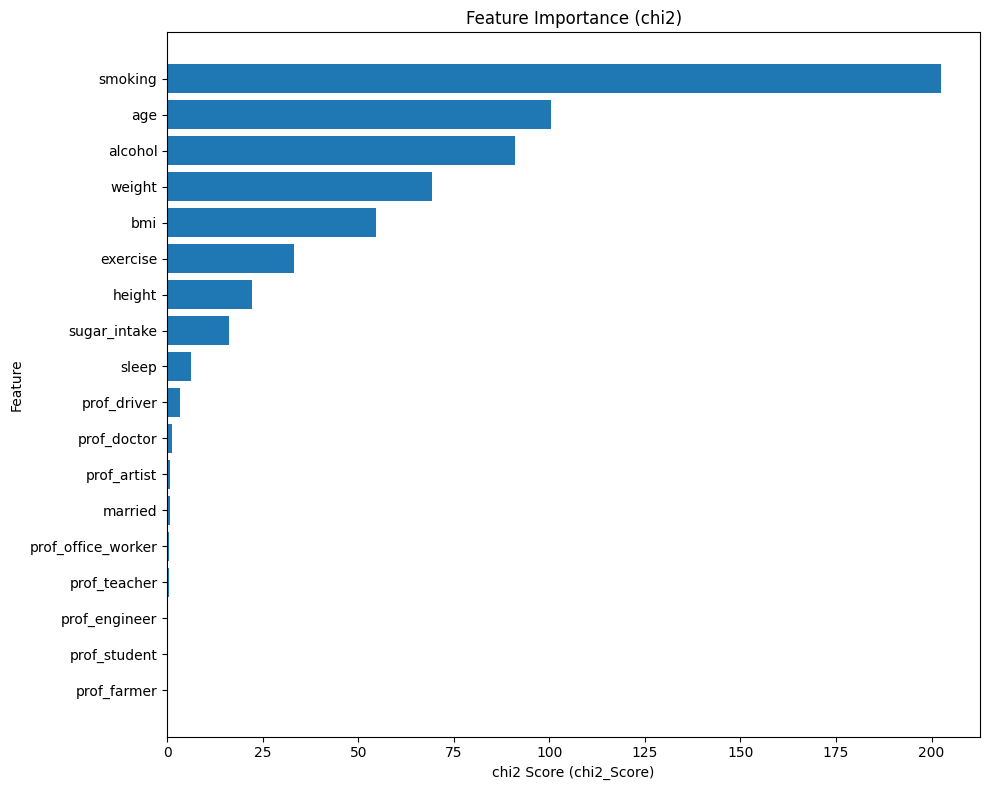

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# (假設 X_train_scaled_df 和 Y_train 依然存在於您的 Colab 記憶體中)

print("--- (A) 特徵選取 (3/5): chi2 (卡方檢定) ---")

# --- 1. 取得特徵名稱 ---
feature_names = X_train_scaled_df.columns

# --- 2. 計算 chi2 (卡方) 分數 ---
# chi2 是一個 "確定性" 演算法，不需要 random_state
print("正在計算 chi2 (卡方) 分數...")

# 建立 SelectKBest 物件，指定計分函數為 chi2
# k='all' 表示我們先計算所有特徵的分數
fs_chi2 = SelectKBest(score_func=chi2, k='all')
fs_chi2.fit(X_train_scaled_df, Y_train)
print("計算完成。")

# --- 3. 建立分數總表 (用於報告) ---
chi2_scores_df = pd.DataFrame({
    'Feature': feature_names,
    'chi2_Score': fs_chi2.scores_
})

# 根據 chi2 分數排序
chi2_scores_df = chi2_scores_df.sort_values(by='chi2_Score', ascending=False)

print("\n--- chi2 (卡方檢定) 特徵分數 (由高至低) ---")
# 使用 .to_string() 來確保 18 個特徵全部被印出
print(chi2_scores_df.to_string())
print("\n")

# ---  繪製長條圖 (Bar Chart) ---
import matplotlib.pyplot as plt

print("--- 正在繪製特徵分數長條圖 ---")

# (設定圖表大小，寬 10, 高 8，適合 18 個特徵)
plt.figure(figsize=(10, 8))

# (建立水平長條圖)
# y 軸是特徵名稱, width (寬度) 是分數
plt.barh(chi2_scores_df['Feature'], chi2_scores_df['chi2_Score'])

# (重要!) 反轉 Y 軸，讓分數最高的特徵顯示在最上面
plt.gca().invert_yaxis()

# (加上標題和標籤)
plt.title('Feature Importance (chi2)')
plt.xlabel('chi2 Score (chi2_Score)')
plt.ylabel('Feature')

# (自動調整版面，避免 Y 軸的特徵名稱被裁切)
plt.tight_layout()

# (顯示圖表)
plt.show()

DT

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2 # (重要!) 匯入 chi2
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
dt_chi2_results = [] # (新的結果 list)

print("--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---")
print(f"--- 特徵選取法 (3/5): chi2 (卡方檢定) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (chi2)"

        # (重要!) 使用 chi2 作為計分函數
        selector = SelectKBest(score_func=chi2, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 ---
    model_dt = DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    )

    model_dt.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_dt.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'Decision Tree',
        'Feature Set': 'chi2', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    dt_chi2_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_dt_chi2_df = pd.DataFrame(dt_chi2_results)

print("\n--- 實驗結果：Decision Tree + chi2 ---")
print(results_dt_chi2_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---
--- 特徵選取法 (3/5): chi2 (卡方檢定) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.04 秒)
已完成: K=10 (Top 10 Features (chi2)) (耗時: 0.04 秒)
已完成: K=9 (Top 9 Features (chi2)) (耗時: 0.04 秒)
已完成: K=8 (Top 8 Features (chi2)) (耗時: 0.04 秒)
已完成: K=7 (Top 7 Features (chi2)) (耗時: 0.04 秒)
已完成: K=6 (Top 6 Features (chi2)) (耗時: 0.04 秒)
已完成: K=5 (Top 5 Features (chi2)) (耗時: 0.04 秒)
已完成: K=4 (Top 4 Features (chi2)) (耗時: 0.04 秒)

--- 實驗結果：Decision Tree + chi2 ---
        Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Decision Tree        chi2 18   0.99800               0.99800            0.99800              0.99800     0.03758
Decision Tree        chi2 10   0.99700               0.99701            0.99700              0.99700     0.03886
Decision Tree        chi2  9   0.99900               0.99900            0.99900              0.99900     0.04097
Decision Tree        chi2  8   0.92400           

RF-bag

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # (重要!) 換成 RF
from sklearn.feature_selection import SelectKBest, chi2 # (重要!) 匯入 chi2
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
rf_chi2_results = [] # (新的結果 list)

print("--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---")
print(f"--- 特徵選取法 (3/5): chi2 (卡方檢定) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (chi2)"

        # (重要!) 使用 chi2 作為計分函數
        selector = SelectKBest(score_func=chi2, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 RandomForest) ---
    model_rf = RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        max_features=None
    )

    model_rf.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_rf.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'Random Forest', # (更改模型名稱)
        'Feature Set': 'chi2', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    rf_chi2_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_rf_chi2_df = pd.DataFrame(rf_chi2_results)

print("\n--- 實驗結果：Random Forest + chi2 ---")
print(results_rf_chi2_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---
--- 特徵選取法 (3/5): chi2 (卡方檢定) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.79 秒)
已完成: K=10 (Top 10 Features (chi2)) (耗時: 0.71 秒)
已完成: K=9 (Top 9 Features (chi2)) (耗時: 0.78 秒)
已完成: K=8 (Top 8 Features (chi2)) (耗時: 0.76 秒)
已完成: K=7 (Top 7 Features (chi2)) (耗時: 1.13 秒)
已完成: K=6 (Top 6 Features (chi2)) (耗時: 0.97 秒)
已完成: K=5 (Top 5 Features (chi2)) (耗時: 1.09 秒)
已完成: K=4 (Top 4 Features (chi2)) (耗時: 0.70 秒)

--- 實驗結果：Random Forest + chi2 ---
        Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Random Forest        chi2 18   0.99800               0.99801            0.99800              0.99800     0.78850
Random Forest        chi2 10   0.99900               0.99900            0.99900              0.99900     0.71412
Random Forest        chi2  9   0.99900               0.99900            0.99900              0.99900     0.77760
Random Forest        chi2  8   0.94700 

RF-boost(XGBoost)

In [ ]:
# --- 0. 安裝 xgboost (如果已安裝，會自動跳過) ---
!pip install xgboost

import pandas as pd
import xgboost as xgb # 匯入 xgboost
from sklearn.feature_selection import SelectKBest, chi2 # (重要!) 匯入 chi2
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
xgb_chi2_results = [] # (新的結果 list)

# (重要!) 計算不平衡權重
# 負類別 (0, 'high'): 3490
# 正類別 (1, 'low'): 1510
scale_pos_weight_value = 3490 / 1510
print(f"--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: {scale_pos_weight_value:.4f} ---")

print("\n--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---")
print(f"--- 特徵選取法 (3/5): chi2 (卡方檢定) ---")
print(f"---  ...正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (chi2)"

        # (重要!) 使用 chi2 作為計分函數
        selector = SelectKBest(score_func=chi2, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 XGBClassifier) ---
    model_xgb = xgb.XGBClassifier(
        random_state=42,          # 固定隨機種子
        scale_pos_weight=scale_pos_weight_value, # (重要!) 處理不平衡
        use_label_encoder=False,
        eval_metric='logloss'
    )

    model_xgb.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_xgb.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'XGBoost', # (更改模型名稱)
        'Feature Set': 'chi2', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    xgb_chi2_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_xgb_chi2_df = pd.DataFrame(xgb_chi2_results)

print("\n--- 實驗結果：XGBoost + chi2 ---")
print(results_xgb_chi2_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: 2.3113 ---

--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---
--- 特徵選取法 (3/5): chi2 (卡方檢定) ---
---  ...正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.15 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=10 (Top 10 Features (chi2)) (耗時: 0.09 秒)
已完成: K=9 (Top 9 Features (chi2)) (耗時: 0.08 秒)
已完成: K=8 (Top 8 Features (chi2)) (耗時: 0.09 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=7 (Top 7 Features (chi2)) (耗時: 0.09 秒)
已完成: K=6 (Top 6 Features (chi2)) (耗時: 0.12 秒)
已完成: K=5 (Top 5 Features (chi2)) (耗時: 0.08 秒)
已完成: K=4 (Top 4 Features (chi2)) (耗時: 0.07 秒)

--- 實驗結果：XGBoost + chi2 ---
  Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
XGBoost        chi2 18   0.99900               0.99900            0.99900              0.99900     0.14785
XGBoost        chi2 10   0.99900               0.99900            0.99900              0.99900     0.08749
XGBoost        chi2  9   0.99900               0.99900            0.99900              0.99900     0.08093
XGBoost        chi2  8   0.94900               0.94996            0.94900              0.94930     0.09276
XGBoost        chi2  7   0.88900               0.89375            0.88900              0.89045     0.09239
XGBoost        chi2  6   0.89800               0.90355            0.89800              0.89952     0.12024
XGBoost        chi2  5   0.81800      

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [05:34:52] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SVM

In [ ]:
import pandas as pd
from sklearn.svm import SVC # (重要!) 匯入 SVC
from sklearn.feature_selection import SelectKBest, chi2 # (重要!) 匯入 chi2
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
svm_chi2_results = [] # (新的結果 list)

print("--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---")
print(f"--- 特徵選取法 (3/5): chi2 (卡方檢定) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗 (注意: SVM 速度較慢)... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (chi2)"

        # (重要!) 使用 chi2 作為計分函數
        selector = SelectKBest(score_func=chi2, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 SVC) ---
    model_svm = SVC(
        random_state=42,          # 固定隨機種子
        class_weight='balanced',   # (重要!) 處理不平衡
        C=10,                      # 調整懲罰參數 C
        gamma='scale'
    )

    model_svm.fit(X_train_run, Y_train)

    # --- C. 評估模型 ---
    Y_pred = model_svm.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'SVM', # (更改模型名稱)
        'Feature Set': 'chi2', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    svm_chi2_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_svm_chi2_df = pd.DataFrame(svm_chi2_results)

print("\n--- 實驗結果：SVM + chi2 ---")
print(results_svm_chi2_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---
--- 特徵選取法 (3/5): chi2 (卡方檢定) ---
--- 正在執行 8 次實驗 (注意: SVM 速度較慢)... ---
已完成: K=18 (All Features (18)) (耗時: 0.65 秒)
已完成: K=10 (Top 10 Features (chi2)) (耗時: 0.78 秒)
已完成: K=9 (Top 9 Features (chi2)) (耗時: 0.61 秒)
已完成: K=8 (Top 8 Features (chi2)) (耗時: 0.95 秒)
已完成: K=7 (Top 7 Features (chi2)) (耗時: 1.52 秒)
已完成: K=6 (Top 6 Features (chi2)) (耗時: 1.10 秒)
已完成: K=5 (Top 5 Features (chi2)) (耗時: 2.10 秒)
已完成: K=4 (Top 4 Features (chi2)) (耗時: 2.76 秒)

--- 實驗結果：SVM + chi2 ---
Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  SVM        chi2 18   0.88400               0.88867            0.88400              0.88547     0.64853
  SVM        chi2 10   0.95800               0.96011            0.95800              0.95844     0.77715
  SVM        chi2  9   0.95700               0.95927            0.95700              0.95746     0.61111
  SVM        chi2  8   0.93100               0.93848            0.9

SVM 0/1

In [ ]:
import pandas as pd
from sklearn.svm import SVC # (重要!) 匯入 SVC
from sklearn.feature_selection import SelectKBest, chi2 # (重要!) 匯入 chi2
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
svm_chi2_results = [] # (新的結果 list)

print("--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---")
print(f"--- 特徵選取法 (3/5): chi2 (卡方檢定) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗 (注意: SVM 速度較慢)... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (chi2)"

        # (重要!) 使用 chi2 作為計分函數
        selector = SelectKBest(score_func=chi2, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. 訓練模型 (換成 SVC) ---
    model_svm = SVC(
        random_state=42,          # 固定隨機種子
        # class_weight='balanced',   # (重要!) 處理不平衡
        C=10,                      # 調整懲罰參數 C
        gamma='scale'
    )

    model_svm.fit(X_train_run, Y_train)


    # --- C. 評估模型 ---
    Y_pred = model_svm.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    # --- 取得 per-class metrics ---
    metrics_0 = report['0']
    metrics_1 = report['1']

    # Overall accuracy
    accuracy = accuracy_score(Y_test, Y_pred)

    end_time = time.time()

    # --- D. 儲存結果 ---
    result_dict = {
        'Model': 'SVM',
        'Feature Set': 'chi2',
        'K': k,

        # --- overall ---
        'Accuracy': accuracy,

        # --- per class metrics ---
        'Precision_0': metrics_0['precision'],
        'Recall_0': metrics_0['recall'],   # = class 0 accuracy
        'F1_0': metrics_0['f1-score'],

        'Precision_1': metrics_1['precision'],
        'Recall_1': metrics_1['recall'],   # = class 1 accuracy
        'F1_1': metrics_1['f1-score'],

        'Time (sec)': time.time() - start_time
    }


    svm_chi2_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_svm_chi2_df = pd.DataFrame(svm_chi2_results)

print("\n--- 實驗結果：SVM + chi2 ---")
print(results_svm_chi2_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---
--- 特徵選取法 (3/5): chi2 (卡方檢定) ---
--- 正在執行 8 次實驗 (注意: SVM 速度較慢)... ---
已完成: K=18 (All Features (18)) (耗時: 0.99 秒)
已完成: K=10 (Top 10 Features (chi2)) (耗時: 0.59 秒)
已完成: K=9 (Top 9 Features (chi2)) (耗時: 0.47 秒)
已完成: K=8 (Top 8 Features (chi2)) (耗時: 1.07 秒)
已完成: K=7 (Top 7 Features (chi2)) (耗時: 0.55 秒)
已完成: K=6 (Top 6 Features (chi2)) (耗時: 0.58 秒)
已完成: K=5 (Top 5 Features (chi2)) (耗時: 0.76 秒)
已完成: K=4 (Top 4 Features (chi2)) (耗時: 1.57 秒)

--- 實驗結果：SVM + chi2 ---
Model Feature Set  K  Accuracy  Precision_0  Recall_0    F1_0  Precision_1  Recall_1    F1_1  Time (sec)
  SVM        chi2 18   0.89100      0.91655   0.92837 0.92242      0.82935   0.80464 0.81681     0.99203
  SVM        chi2 10   0.94800      0.95621   0.96991 0.96302      0.92808   0.89735 0.91246     0.58604
  SVM        chi2  9   0.96000      0.96469   0.97851 0.97155      0.94863   0.91722 0.93266     0.47417
  SVM        chi2  8   0.93400      0.95533   0.94986 0.95259      

SVM+SMOTE

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.svm import SVC # (重要!) 匯入 SVC
from sklearn.feature_selection import SelectKBest, chi2 # (重要!) 匯入 chi2
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (!!! 修改點 1: 匯入 SMOTE !!!)
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
svm_chi2_smote_results = [] # (!!! 修改點 2: 新的 list 名稱 !!!)

print("--- (B) 實驗 (4/6): SVM (使用 SMOTE) ---") # (修改了標題)
print(f"--- 特徵選取法 (3/5): chi2 (卡方檢定) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗 (注意: SVM 速度較慢)... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run = X_train_scaled_df
        X_test_run = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (chi2)"

        # (重要!) 使用 chi2 作為計分函數
        selector = SelectKBest(score_func=chi2, k=k)

        X_train_run = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run = selector.transform(X_test_scaled_df)

    # --- B. (!!! 修改點 3: 插入 SMOTE !!!) ---
    smote = SMOTE(random_state=42)
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run, Y_train)

    # --- C. 訓練模型 (換成 SVC) ---
    model_svm = SVC(
        random_state=42,          # 固定隨機種子
        # class_weight='balanced',  # (保持註解，因為已使用 SMOTE)
        C=10,                     # 調整懲罰參數 C
        gamma='scale'             #
    )

    # (!!! 修改點 4: fit 在 resampled 資料上 !!!)
    model_svm.fit(X_train_resampled, Y_train_resampled)

    # --- D. 評估模型 ---
    Y_pred = model_svm.predict(X_test_run)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- E. 儲存結果 ---
    result_dict = {
        'Model': 'SVM (SMOTE)', # (!!! 修改點 5: 更改模型名稱 !!!)
        'Feature Set': 'chi2',
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    svm_chi2_smote_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_svm_chi2_smote_df = pd.DataFrame(svm_chi2_smote_results) # (!!! 修改點 6: 新的 DF 名稱 !!!)

print("\n--- 實驗結果：SVM (SMOTE) + chi2 ---") # (修改了標題)
print(results_svm_chi2_smote_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (4/6): SVM (使用 SMOTE) ---
--- 特徵選取法 (3/5): chi2 (卡方檢定) ---
--- 正在執行 8 次實驗 (注意: SVM 速度較慢)... ---
已完成: K=18 (All Features (18)) (耗時: 1.30 秒)
已完成: K=10 (Top 10 Features (chi2)) (耗時: 0.83 秒)
已完成: K=9 (Top 9 Features (chi2)) (耗時: 0.77 秒)
已完成: K=8 (Top 8 Features (chi2)) (耗時: 1.12 秒)
已完成: K=7 (Top 7 Features (chi2)) (耗時: 1.72 秒)
已完成: K=6 (Top 6 Features (chi2)) (耗時: 1.88 秒)
已完成: K=5 (Top 5 Features (chi2)) (耗時: 2.02 秒)
已完成: K=4 (Top 4 Features (chi2)) (耗時: 1.91 秒)

--- 實驗結果：SVM (SMOTE) + chi2 ---
      Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
SVM (SMOTE)        chi2 18   0.88900               0.89124            0.88900              0.88984     1.29614
SVM (SMOTE)        chi2 10   0.95800               0.95895            0.95800              0.95826     0.83401
SVM (SMOTE)        chi2  9   0.96000               0.96058            0.96000              0.96018     0.76641
SVM (SMOTE)        chi2  8   0.93600             

MLP

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2 # (重要!) 匯入 chi2
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time
import warnings
from sklearn.exceptions import ConvergenceWarning

# (忽略 MLP 可能的收斂警告)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
mlp_chi2_results = [] # (新的結果 list)

print("--- (B) 實驗 (5/6): MLP (Neural Network) ---")
print(f"--- 特徵選取法 (3/5): chi2 (卡方檢定) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run_k = X_train_scaled_df
        X_test_run_k = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (chi2)"

        # (重要!) 使用 chi2 作為計分函數
        selector = SelectKBest(score_func=chi2, k=k)

        X_train_run_k = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run_k = selector.transform(X_test_scaled_df)

    # --- B. (重要!) 執行 SMOTE ---
    smote = SMOTE(random_state=42)
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

    # --- C. 訓練模型 (換成 MLPClassifier) ---
    # (使用預設 hidden_layer_sizes=(100,) )
    model_mlp = MLPClassifier(
        random_state=42,
        max_iter=500, # (確保收斂)
        hidden_layer_sizes=(50,50)
    )

    model_mlp.fit(X_train_resampled, Y_train_resampled)

    # --- D. 評估模型 ---
    Y_pred = model_mlp.predict(X_test_run_k)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- E. 儲存結果 ---
    result_dict = {
        'Model': 'MLP',
        'Feature Set': 'chi2', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    mlp_chi2_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_mlp_chi2_df = pd.DataFrame(mlp_chi2_results)

print("\n--- 實驗結果：MLP + chi2 ---")
print(results_mlp_chi2_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (5/6): MLP (Neural Network) ---
--- 特徵選取法 (3/5): chi2 (卡方檢定) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 10.61 秒)
已完成: K=10 (Top 10 Features (chi2)) (耗時: 8.42 秒)
已完成: K=9 (Top 9 Features (chi2)) (耗時: 6.97 秒)
已完成: K=8 (Top 8 Features (chi2)) (耗時: 6.50 秒)
已完成: K=7 (Top 7 Features (chi2)) (耗時: 4.39 秒)
已完成: K=6 (Top 6 Features (chi2)) (耗時: 3.80 秒)
已完成: K=5 (Top 5 Features (chi2)) (耗時: 5.13 秒)
已完成: K=4 (Top 4 Features (chi2)) (耗時: 4.48 秒)

--- 實驗結果：MLP + chi2 ---
Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  MLP        chi2 18   0.92200               0.92146            0.92200              0.92162    10.61064
  MLP        chi2 10   0.96800               0.96815            0.96800              0.96806     8.41874
  MLP        chi2  9   0.96700               0.96760            0.96700              0.96716     6.96891
  MLP        chi2  8   0.94900               0.95341            0.94900              0.94

MLP 0/1

--- (B) 實驗 (5/6): MLP (Neural Network) ---
--- 特徵選取法 (3/5): chi2 (卡方檢定) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 18.51 秒)
已完成: K=10 (Top 10 Features (chi2)) (耗時: 12.76 秒)
已完成: K=9 (Top 9 Features (chi2)) (耗時: 10.34 秒)
已完成: K=8 (Top 8 Features (chi2)) (耗時: 5.28 秒)
已完成: K=7 (Top 7 Features (chi2)) (耗時: 5.48 秒)
已完成: K=6 (Top 6 Features (chi2)) (耗時: 3.78 秒)
已完成: K=5 (Top 5 Features (chi2)) (耗時: 3.77 秒)
已完成: K=4 (Top 4 Features (chi2)) (耗時: 5.77 秒)

--- 實驗結果：MLP + chi2 ---
Model   Feature Set  K  Accuracy  Precision_0  Recall_0    F1_0  Precision_1  Recall_1    F1_1  Time (sec)
  MLP DT Importance 18   0.92200      0.93785   0.95129 0.94452      0.88356   0.85430 0.86869    18.51103
  MLP DT Importance 10   0.96800      0.97983   0.97421 0.97701      0.94118   0.95364 0.94737    12.75977
  MLP DT Importance  9   0.96700      0.98399   0.96848 0.97617      0.92971   0.96358 0.94634    10.33884
  MLP DT Importance  8   0.94900      0.98941   0.93696 0.96247      0.87021   

KNN

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # (重要!) 匯入 kNN
from sklearn.feature_selection import SelectKBest, chi2 # (重要!) 匯入 chi2
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
knn_chi2_results = [] # (新的結果 list)

print("--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---")
print(f"--- 特徵選取法 (3/5): chi2 (卡方檢定) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

for k in K_values:

    start_time = time.time()

    # --- A. 準備資料 ---
    if k == 18:
        X_train_run_k = X_train_scaled_df
        X_test_run_k = X_test_scaled_df
        feature_set_name = "All Features (18)"
    else:
        feature_set_name = f"Top {k} Features (chi2)"

        # (重要!) 使用 chi2 作為計分函數
        selector = SelectKBest(score_func=chi2, k=k)

        X_train_run_k = selector.fit_transform(X_train_scaled_df, Y_train)
        X_test_run_k = selector.transform(X_test_scaled_df)

    # --- B. (重要!) 執行 SMOTE ---
    smote = SMOTE(random_state=42)
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

    # --- C. 訓練模型 (換成 KNeighborsClassifier) ---
    # 使用預設超參數 (n_neighbors=5, weights='uniform')
    model_knn = KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    )

    model_knn.fit(X_train_resampled, Y_train_resampled)

    # --- D. 評估模型 ---
    Y_pred = model_knn.predict(X_test_run_k)
    report = classification_report(Y_test, Y_pred, output_dict=True)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']

    end_time = time.time()

    # --- E. 儲存結果 ---
    result_dict = {
        'Model': 'kNN',
        'Feature Set': 'chi2', # (更改特徵選取法名稱)
        'K': k,
        'Accuracy': accuracy,
        'Precision (Weighted)': precision,
        'Recall (Weighted)': recall,
        'F1-Score (Weighted)': f1,
        'Time (sec)': time.time() - start_time
    }

    knn_chi2_results.append(result_dict)
    print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

# --- 3. 將 8 次結果轉換為 DataFrame ---

results_knn_chi2_df = pd.DataFrame(knn_chi2_results)

print("\n--- 實驗結果：kNN + chi2 ---")
print(results_knn_chi2_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---
--- 特徵選取法 (3/5): chi2 (卡方檢定) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.15 秒)
已完成: K=10 (Top 10 Features (chi2)) (耗時: 0.13 秒)
已完成: K=9 (Top 9 Features (chi2)) (耗時: 0.12 秒)
已完成: K=8 (Top 8 Features (chi2)) (耗時: 0.09 秒)
已完成: K=7 (Top 7 Features (chi2)) (耗時: 0.08 秒)
已完成: K=6 (Top 6 Features (chi2)) (耗時: 0.07 秒)
已完成: K=5 (Top 5 Features (chi2)) (耗時: 0.07 秒)
已完成: K=4 (Top 4 Features (chi2)) (耗時: 0.06 秒)

--- 實驗結果：kNN + chi2 ---
Model Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  kNN        chi2 18   0.84300               0.86677            0.84300              0.84780     0.14505
  kNN        chi2 10   0.93000               0.93434            0.93000              0.93099     0.13221
  kNN        chi2  9   0.93800               0.94178            0.93800              0.93883     0.11573
  kNN        chi2  8   0.92400               0.92776            0.92400              

# 特徵選取-DT

計算特徵分數

--- (A) 特徵選取 (4/5): DT (Decision Tree Importance) ---
正在訓練基準決策樹模型...
訓練完成。

--- DT (Decision Tree) 特徵重要性 (由高至低) ---
               Feature  DT_Importance
0                  age   2.401626e-01
9                  bmi   2.105532e-01
3             exercise   1.609065e-01
7              alcohol   1.082908e-01
4                sleep   1.002475e-01
6              smoking   9.809986e-02
5         sugar_intake   7.813025e-02
1               weight   1.268049e-03
11         prof_doctor   9.196837e-04
2               height   8.448090e-04
13       prof_engineer   5.767599e-04
16        prof_student   3.172991e-14
17        prof_teacher   3.084640e-15
10         prof_artist   5.137565e-17
15  prof_office_worker   1.272462e-18
8              married   0.000000e+00
12         prof_driver   0.000000e+00
14         prof_farmer   0.000000e+00


--- 正在繪製特徵分數長條圖 ---


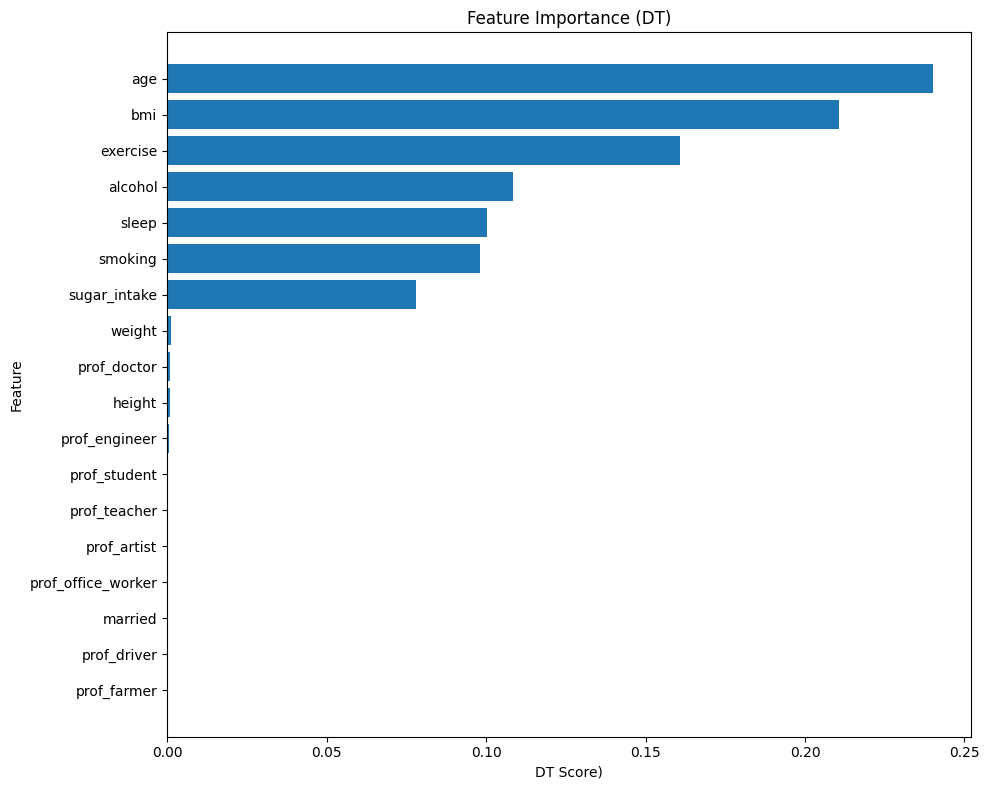

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# (假設 X_train_scaled_df 和 Y_train 依然存在於您的 Colab 記憶體中)

print("--- (A) 特徵選取 (4/5): DT (Decision Tree Importance) ---")

# --- 1. 取得特徵名稱 ---
feature_names = X_train_scaled_df.columns

# --- 2. 訓練一棵基準決策樹 (使用全部特徵) ---
print("正在訓練基準決策樹模型...")
# (重要!) 必須使用 class_weight='balanced' 來獲得公平的重要性
dt_model_for_importance = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced'
)
dt_model_for_importance.fit(X_train_scaled_df, Y_train)
print("訓練完成。")

# --- 3. 提取特徵重要性分數 ---
dt_importances = dt_model_for_importance.feature_importances_

# --- 4. 建立分數總表 (用於報告) ---
dt_scores_df = pd.DataFrame({
    'Feature': feature_names,
    'DT_Importance': dt_importances
})

# 根據重要性分數排序
dt_scores_df = dt_scores_df.sort_values(by='DT_Importance', ascending=False)

print("\n--- DT (Decision Tree) 特徵重要性 (由高至低) ---")
# 使用 .to_string() 來確保 18 個特徵全部被印出
print(dt_scores_df.to_string())
print("\n")

# ---  繪製長條圖 (Bar Chart) ---
import matplotlib.pyplot as plt

print("--- 正在繪製特徵分數長條圖 ---")

# (設定圖表大小，寬 10, 高 8，適合 18 個特徵)
plt.figure(figsize=(10, 8))

# (建立水平長條圖)
# y 軸是特徵名稱, width (寬度) 是分數
plt.barh(dt_scores_df['Feature'], dt_scores_df['DT_Importance'])

# (重要!) 反轉 Y 軸，讓分數最高的特徵顯示在最上面
plt.gca().invert_yaxis()

# (加上標題和標籤)
plt.title('Feature Importance (DT)')
plt.xlabel('DT Score)')
plt.ylabel('Feature')

# (自動調整版面，避免 Y 軸的特徵名稱被裁切)
plt.tight_layout()

# (顯示圖表)
plt.show()

DT

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您上一步計算出的 DT 特徵重要性 DataFrame)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
dt_dt_results = [] # (新的結果 list)

# (重要!) 獲取 DT 重要性排序的特徵名稱列表
try:
    # 確保 dt_scores_df 存在且已排序
    dt_ranked_features = dt_scores_df['Feature'].tolist()
    print("--- 已成功獲取 DT 特徵重要性排名 ---")
except NameError:
    print("錯誤：找不到 'dt_scores_df' (DT 特徵重要性分數表)。請重新執行上一段計算 DT Importance 的程式碼。")
    # 如果 Colab 重連，需要重新計算 dt_scores_df

print("\n--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---")
print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

# (確保 dt_scores_df 存在後才繼續)
if 'dt_ranked_features' in locals():
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. 訓練模型 ---
        model_dt = DecisionTreeClassifier(
            random_state=42,
            class_weight='balanced'
        )

        model_dt.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_dt.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'Decision Tree',
            'Feature Set': 'DT Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        dt_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_dt_dt_df = pd.DataFrame(dt_dt_results)

    print("\n--- 實驗結果：Decision Tree + DT Importance ---")
    print(results_dt_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

else:
    print("無法執行實驗，因為缺少 'dt_scores_df'。")

--- 已成功獲取 DT 特徵重要性排名 ---

--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.04 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.03 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.02 秒)

--- 實驗結果：Decision Tree + DT Importance ---
        Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Decision Tree DT Importance 18   0.99800               0.99800            0.99800              0.99800     0.03875
Decision Tree DT Importance 10   0.99800               0.99800            0.99800              0.99800     0.03210
Decision Tree DT Importance  9   0.99900

DT 0/1

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您上一步計算出的 DT 特徵重要性 DataFrame)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
dt_dt_results = [] # (新的結果 list)

# (重要!) 獲取 DT 重要性排序的特徵名稱列表
try:
    # 確保 dt_scores_df 存在且已排序
    dt_ranked_features = dt_scores_df['Feature'].tolist()
    print("--- 已成功獲取 DT 特徵重要性排名 ---")
except NameError:
    print("錯誤：找不到 'dt_scores_df' (DT 特徵重要性分數表)。請重新執行上一段計算 DT Importance 的程式碼。")
    # 如果 Colab 重連，需要重新計算 dt_scores_df

print("\n--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---")
print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

# (確保 dt_scores_df 存在後才繼續)
if 'dt_ranked_features' in locals():
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. 訓練模型 ---
        model_dt = DecisionTreeClassifier(
            random_state=42,
            # class_weight='balanced'
        )

        model_dt.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_dt.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        # --- 取得 per-class metrics ---
        metrics_0 = report['0']
        metrics_1 = report['1']

        # Overall accuracy
        accuracy = accuracy_score(Y_test, Y_pred)

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'Decision Tree',
            'Feature Set': 'DT Importance',
            'K': k,

            # --- overall ---
            'Accuracy': accuracy,

            # --- per class metrics ---
            'Precision_0': metrics_0['precision'],
            'Recall_0': metrics_0['recall'],   # = class 0 accuracy
            'F1_0': metrics_0['f1-score'],

            'Precision_1': metrics_1['precision'],
            'Recall_1': metrics_1['recall'],   # = class 1 accuracy
            'F1_1': metrics_1['f1-score'],

            'Time (sec)': time.time() - start_time
        }


        dt_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_dt_dt_df = pd.DataFrame(dt_dt_results)

    print("\n--- 實驗結果：Decision Tree + DT Importance ---")
    print(results_dt_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

else:
    print("無法執行實驗，因為缺少 'dt_scores_df'。")

--- 已成功獲取 DT 特徵重要性排名 ---

--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.03 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.02 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.02 秒)

--- 實驗結果：Decision Tree + DT Importance ---
        Model   Feature Set  K  Accuracy  Precision_0  Recall_0    F1_0  Precision_1  Recall_1    F1_1  Time (sec)
Decision Tree DT Importance 18   0.99600      0.99713   0.99713 0.99713      0.99338   0.99338 0.99338     0.02682
Decision Tree DT Importance 10   0.99600      0.99713   0.99713 0.99713      0.99338   0.99338 0.99338     0.02226
Decision Tree DT Importance  9   0.99500

RF-bag

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # (重要!) 換成 RF
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
rf_dt_results = [] # (新的結果 list)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. 訓練模型 (換成 RandomForest) ---
        model_rf = RandomForestClassifier(
            random_state=42,
            class_weight='balanced'
        )

        model_rf.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_rf.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'Random Forest', # (更改模型名稱)
            'Feature Set': 'DT Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        rf_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_rf_dt_df = pd.DataFrame(rf_dt_results)

    print("\n--- 實驗結果：Random Forest + DT Importance ---")
    print(results_rf_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.99 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 1.00 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 1.54 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 1.30 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.76 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 1.40 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 2.58 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 2.37 秒)

--- 實驗結果：Random Forest + DT Importance ---
        Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Random Forest DT Importance 18   0.99400               0.99400            0.99400              0.99400     0.99119
Random Forest DT Importance 10   0.99700               0.99700            0.99700              0.99700     1.00017
Random Forest DT Importance  9   0.99600               0

RF 0/1

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # (重要!) 換成 RF
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
rf_dt_results = [] # (新的結果 list)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. 訓練模型 (換成 RandomForest) ---
        model_rf = RandomForestClassifier(
            random_state=42,
            # class_weight='balanced'
        )

        model_rf.fit(X_train_run, Y_train)

              # --- C. 評估模型 ---
        Y_pred = model_rf.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        # --- 取得 per-class metrics ---
        metrics_0 = report['0']
        metrics_1 = report['1']

        # Overall accuracy
        accuracy = accuracy_score(Y_test, Y_pred)

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'RF',
            'Feature Set': 'DT Importance',
            'K': k,

            # --- overall ---
            'Accuracy': accuracy,

            # --- per class metrics ---
            'Precision_0': metrics_0['precision'],
            'Recall_0': metrics_0['recall'],   # = class 0 accuracy
            'F1_0': metrics_0['f1-score'],

            'Precision_1': metrics_1['precision'],
            'Recall_1': metrics_1['recall'],   # = class 1 accuracy
            'F1_1': metrics_1['f1-score'],

            'Time (sec)': time.time() - start_time
        }


        rf_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_rf_dt_df = pd.DataFrame(rf_dt_results)

    print("\n--- 實驗結果：Random Forest + DT Importance ---")
    print(results_rf_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.67 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.56 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.94 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.37 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.33 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.36 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.44 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.42 秒)

--- 實驗結果：Random Forest + DT Importance ---
Model   Feature Set  K  Accuracy  Precision_0  Recall_0    F1_0  Precision_1  Recall_1    F1_1  Time (sec)
   RF DT Importance 18   0.99400      0.99570   0.99570 0.99570      0.99007   0.99007 0.99007     0.67224
   RF DT Importance 10   0.99700      0.99714   0.99857 0.99785      0.99668   0.99338 0.99502     0.55614
   RF DT Importance  9   0.99600      0.99713   0.99713 0.99713      0.99338   0

RF-boost(XGBoost)

In [ ]:
# --- 0. 安裝 xgboost (如果已安裝，會自動跳過) ---
!pip install xgboost

import pandas as pd
import xgboost as xgb # 匯入 xgboost
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
xgb_dt_results = [] # (新的結果 list)

# (重要!) 計算不平衡權重
# 負類別 (0, 'high'): 3490
# 正類別 (1, 'low'): 1510
scale_pos_weight_value = 3490 / 1510
print(f"--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: {scale_pos_weight_value:.4f} ---")


# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("\n--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. 訓練模型 (換成 XGBClassifier) ---
        model_xgb = xgb.XGBClassifier(
            random_state=42,          # 固定隨機種子
            # scale_pos_weight=scale_pos_weight_value, # (重要!) 處理不平衡
            use_label_encoder=False,
            eval_metric='logloss'
        )

        model_xgb.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_xgb.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'XGBoost', # (更改模型名稱)
            'Feature Set': 'DT Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        xgb_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_xgb_dt_df = pd.DataFrame(xgb_dt_results)

    print("\n--- 實驗結果：XGBoost + DT Importance ---")
    print(results_xgb_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: 2.3113 ---

--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:42] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=18 (All Features (18)) (耗時: 1.61 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.20 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.29 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.15 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.15 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.17 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.20 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:28:45] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.33 秒)

--- 實驗結果：XGBoost + DT Importance ---
  Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
XGBoost DT Importance 18   0.99900               0.99900            0.99900              0.99900     1.60600
XGBoost DT Importance 10   0.99900               0.99900            0.99900              0.99900     0.20120
XGBoost DT Importance  9   0.99900               0.99900            0.99900              0.99900     0.29058
XGBoost DT Importance  8   0.99900               0.99900            0.99900              0.99900     0.14993
XGBoost DT Importance  7   0.99900               0.99900            0.99900              0.99900     0.15262
XGBoost DT Importance  6   0.94300               0.94498            0.94300              0.94352     0.16984
XGBoost DT Importance  5   0.85400               0.86117            0.85400              0.85628     0.20448
XGBoost DT Importance  4   0.81900 

XGBOOST 0/1

In [ ]:
# --- 0. 安裝 xgboost (如果已安裝，會自動跳過) ---
!pip install xgboost

import pandas as pd
import xgboost as xgb # 匯入 xgboost
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
xgb_dt_results = [] # (新的結果 list)

# (重要!) 計算不平衡權重
# 負類別 (0, 'high'): 3490
# 正類別 (1, 'low'): 1510
scale_pos_weight_value = 3490 / 1510
print(f"--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: {scale_pos_weight_value:.4f} ---")


# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("\n--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. 訓練模型 (換成 XGBClassifier) ---
        model_xgb = xgb.XGBClassifier(
            random_state=42,          # 固定隨機種子
            scale_pos_weight=scale_pos_weight_value, # (重要!) 處理不平衡
            use_label_encoder=False,
            eval_metric='logloss'
        )

        model_xgb.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_xgb.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        # --- 取得 per-class metrics ---
        metrics_0 = report['0']
        metrics_1 = report['1']

        # Overall accuracy
        accuracy = accuracy_score(Y_test, Y_pred)

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'XGBOOST',
            'Feature Set': 'DT Importance',
            'K': k,

            # --- overall ---
            'Accuracy': accuracy,

            # --- per class metrics ---
            'Precision_0': metrics_0['precision'],
            'Recall_0': metrics_0['recall'],   # = class 0 accuracy
            'F1_0': metrics_0['f1-score'],

            'Precision_1': metrics_1['precision'],
            'Recall_1': metrics_1['recall'],   # = class 1 accuracy
            'F1_1': metrics_1['f1-score'],

            'Time (sec)': time.time() - start_time
        }


        xgb_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_xgb_dt_df = pd.DataFrame(xgb_dt_results)

    print("\n--- 實驗結果：XGBoost + DT Importance ---")
    print(results_xgb_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: 2.3113 ---

--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.09 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.08 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:43:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:43:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:43:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.09 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.08 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.09 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:43:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:43:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:43:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.09 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.08 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.08 秒)

--- 實驗結果：XGBoost + DT Importance ---
  Model   Feature Set  K  Accuracy  Precision_0  Recall_0    F1_0  Precision_1  Recall_1    F1_1  Time (sec)
XGBOOST DT Importance 18   0.99900      0.99857   1.00000 0.99928      1.00000   0.99669 0.99834     0.09330
XGBOOST DT Importance 10   0.99900      0.99857   1.00000 0.99928      1.00000   0.99669 0.99834     0.08102
XGBOOST DT Importance  9   0.99900      0.99857   1.00000 0.99928      1.00000   0.99669 0.99834     0.08513
XGBOOST DT Importance  8   0.99900      0.99857   1.00000 0.99928      1.00000   0.99669 0.99834     0.08286
XGBOOST DT Importance  7   0.99900      0.99857   1.00000 0.99928      1.00000   0.99669 0.99834     0.09461
XGBOOST DT Importance  6   0.94900      0.98501   0.94126 0.96264      0.87688   0.96689 0.91969     0.09433
XGBOOST DT Importance  5   0.86800

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:43:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:43:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SVM

In [ ]:
import pandas as pd
from sklearn.svm import SVC # (重要!) 匯入 SVC
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
svm_dt_results = [] # (新的結果 list)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗 (注意: SVM 速度較慢)... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. 訓練模型 (換成 SVC) ---
        model_svm = SVC(
            random_state=42,          # 固定隨機種子
            class_weight='balanced',   # (重要!) 處理不平衡
            C=10,
            gamma='scale'
        )

        model_svm.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_svm.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'SVM', # (更改模型名稱)
            'Feature Set': 'DT Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        svm_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_svm_dt_df = pd.DataFrame(svm_dt_results)

    print("\n--- 實驗結果：SVM + DT Importance ---")
    print(results_svm_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗 (注意: SVM 速度較慢)... ---
已完成: K=18 (All Features (18)) (耗時: 0.63 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.41 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.41 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.36 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.23 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.25 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.36 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.43 秒)

--- 實驗結果：SVM + DT Importance ---
Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  SVM DT Importance 18   0.88400               0.88867            0.88400              0.88547     0.62789
  SVM DT Importance 10   0.95400               0.95567            0.95400              0.95440     0.41059
  SVM DT Importance  9   0.94900               0.95114            0.94900   

SVM 0/1

In [ ]:
import pandas as pd
from sklearn.svm import SVC # (重要!) 匯入 SVC
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
svm_dt_results = [] # (新的結果 list)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗 (注意: SVM 速度較慢)... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. 訓練模型 (換成 SVC) ---
        model_svm = SVC(
            random_state=42,          # 固定隨機種子
            class_weight='balanced',   # (重要!) 處理不平衡
            C=10,
            gamma='scale'
        )

        model_svm.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        # --- C. 評估模型 ---
        Y_pred = model_svm.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        # --- 取得 per-class metrics ---
        metrics_0 = report['0']
        metrics_1 = report['1']

        # Overall accuracy
        accuracy = accuracy_score(Y_test, Y_pred)

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'SVM',
            'Feature Set': 'DT Importance',
            'K': k,

            # --- overall ---
            'Accuracy': accuracy,

            # --- per class metrics ---
            'Precision_0': metrics_0['precision'],
            'Recall_0': metrics_0['recall'],   # = class 0 accuracy
            'F1_0': metrics_0['f1-score'],

            'Precision_1': metrics_1['precision'],
            'Recall_1': metrics_1['recall'],   # = class 1 accuracy
            'F1_1': metrics_1['f1-score'],

            'Time (sec)': time.time() - start_time
        }


        svm_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_svm_dt_df = pd.DataFrame(svm_dt_results)

    print("\n--- 實驗結果：SVM + DT Importance ---")
    print(results_svm_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗 (注意: SVM 速度較慢)... ---
已完成: K=18 (All Features (18)) (耗時: 0.94 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.48 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.49 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.44 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.43 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.49 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.71 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.85 秒)

--- 實驗結果：SVM + DT Importance ---
Model   Feature Set  K  Accuracy  Precision_0  Recall_0    F1_0  Precision_1  Recall_1    F1_1  Time (sec)
  SVM DT Importance 18   0.88400      0.93563   0.89542 0.91508      0.78012   0.85762 0.81703     0.94069
  SVM DT Importance 10   0.95400      0.98083   0.95272 0.96657      0.89752   0.95695 0.92628     0.47614
  SVM DT Importance  9   0.94900      0.97926   0.94699 0.96286      0.88615

MLP

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time
import warnings
from sklearn.exceptions import ConvergenceWarning

# (忽略 MLP 可能的收斂警告)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
mlp_dt_results = [] # (新的結果 list)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (5/6): MLP (Neural Network) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. (重要!) 執行 SMOTE ---
        smote = SMOTE(random_state=42)
        X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

        # --- C. 訓練模型 (換成 MLPClassifier) ---
        # (使用預設 hidden_layer_sizes=(100,) )
        model_mlp = MLPClassifier(
            random_state=42,
            max_iter=500, # (確保收斂)
            hidden_layer_sizes=(50,50)
        )

        model_mlp.fit(X_train_resampled, Y_train_resampled)

        # --- D. 評估模型 ---
        Y_pred = model_mlp.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'MLP',
            'Feature Set': 'DT Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        mlp_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_mlp_dt_df = pd.DataFrame(mlp_dt_results)

    print("\n--- 實驗結果：MLP + DT Importance ---")
    print(results_mlp_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (5/6): MLP (Neural Network) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 10.40 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 8.37 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 8.82 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 7.02 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 10.39 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 10.37 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 7.13 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 6.81 秒)

--- 實驗結果：MLP + DT Importance ---
Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  MLP DT Importance 18   0.92200               0.92146            0.92200              0.92162    10.39990
  MLP DT Importance 10   0.97000               0.97099            0.97000              0.97021     8.37029
  MLP DT Importance  9   0.96000               0.95990            0.96000              0.95972  

MLP(無SMOTE)

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
# (雖然這次不用 SMOTE，但保留 import 以防萬一)
!pip install imbalanced-learn

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time
import warnings
from sklearn.exceptions import ConvergenceWarning

# (忽略 MLP 可能的收斂警告)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
mlp_dt_unbalanced_results = [] # (!!! 修改點 1: 新的 list 名稱 !!!)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (5/6): MLP (Neural Network - 無平衡) ---") # (修改了標題)
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. (!!! 修改點 2: 註解掉 SMOTE !!!) ---
        # smote = SMOTE(random_state=42)
        # X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

        # --- C. 訓練模型 (換成 MLPClassifier) ---
        # (使用預設 hidden_layer_sizes=(100,) )
        model_mlp = MLPClassifier(
            random_state=42,
            max_iter=500, # (確保收斂)
            hidden_layer_sizes=(50,50)
        )

        # (!!! 修改點 3: fit 在 "原始" 資料上 !!!)
        model_mlp.fit(X_train_run_k, Y_train) # (使用 X_train_run_k, Y_train)

        # --- D. 評估模型 ---
        Y_pred = model_mlp.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'MLP (Unbalanced)', # (!!! 修改點 4: 更改模型名稱 !!!)
            'Feature Set': 'DT Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        mlp_dt_unbalanced_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_mlp_dt_unbalanced_df = pd.DataFrame(mlp_dt_unbalanced_results) # (!!! 修改點 5: 新的 DF 名稱 !!!)

    print("\n--- 實驗結果：MLP (Unbalanced) + DT Importance ---") # (修改了標題)
    print(results_mlp_dt_unbalanced_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (5/6): MLP (Neural Network - 無平衡) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 19.37 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 10.08 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 9.68 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 5.14 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 8.71 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 8.24 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 4.80 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 5.59 秒)

--- 實驗結果：MLP (Unbalanced) + DT Importance ---
           Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
MLP (Unbalanced) DT Importance 18   0.94600               0.94583            0.94600              0.94590    19.37302
MLP (Unbalanced) DT Importance 10   0.97000               0.97000            0.97000              0.97000    10.07843
MLP (Unbalanced) DT Importance  9   0.96700  

MLP 0/1

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time
import warnings
from sklearn.exceptions import ConvergenceWarning

# (忽略 MLP 可能的收斂警告)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
mlp_dt_results = [] # (新的結果 list)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (5/6): MLP (Neural Network) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. (重要!) 執行 SMOTE ---
        smote = SMOTE(random_state=42)
        X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

        # --- C. 訓練模型 (換成 MLPClassifier) ---
        # (使用預設 hidden_layer_sizes=(100,) )
        model_mlp = MLPClassifier(
            random_state=42,
            max_iter=500, # (確保收斂)
            hidden_layer_sizes=(50,50)
        )

        model_mlp.fit(X_train_resampled, Y_train_resampled)

                # --- D. 評估模型 ---
        Y_pred = model_mlp.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        # --- per-class metrics ---
        metrics_0 = report['0']
        metrics_1 = report['1']

        # Overall accuracy
        accuracy = accuracy_score(Y_test, Y_pred)

        end_time = time.time()

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'MLP',
            'Feature Set': 'DT Importance',
            'K': k,

            # --- overall ---
            'Accuracy': accuracy,

            # --- per class metrics ---
            'Precision_0': metrics_0['precision'],
            'Recall_0': metrics_0['recall'],   # = class 0 accuracy
            'F1_0': metrics_0['f1-score'],

            'Precision_1': metrics_1['precision'],
            'Recall_1': metrics_1['recall'],   # = class 1 accuracy
            'F1_1': metrics_1['f1-score'],

            'Time (sec)': time.time() - start_time
        }


        mlp_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_mlp_dt_df = pd.DataFrame(mlp_dt_results)

    print("\n--- 實驗結果：MLP + DT Importance ---")
    print(results_mlp_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

MLP 0/1 NO SMOTE

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
# from imblearn.over_sampling import SMOTE # <-- 不用 SMOTE 就不用 import
import time
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

K_values = [18, 10, 9, 8, 7, 6, 5, 4]
mlp_dt_results = []

if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features'")
else:
    print("--- (B) 實驗 (5/6): MLP (Neural Network) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance, No SMOTE) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    for k in K_values:

        start_time = time.time()

        # --- A. 特徵選取 ---
        if k == 18:
            selected_features = feature_names
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
        else:
            selected_features = dt_ranked_features[:k]
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]

        # --- B. ⚠ 不使用 SMOTE ---
        X_train_resampled = X_train_run_k
        Y_train_resampled = Y_train
        balance_method = "No SMOTE"

        # --- C. 訓練 MLP ---
        model_mlp = MLPClassifier(
            random_state=42,
            max_iter=500,
            hidden_layer_sizes=(50,50)
        )

        model_mlp.fit(X_train_resampled, Y_train_resampled)

        # --- D. 評估模型 ---
        Y_pred = model_mlp.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        metrics_0 = report['0']
        metrics_1 = report['1']

        accuracy = accuracy_score(Y_test, Y_pred)

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'MLP',
            'Feature Set': 'DT Importance',
            'Sampling': balance_method,
            'K': k,

            'Accuracy': accuracy,
            'Precision_0': metrics_0['precision'],
            'Recall_0': metrics_0['recall'],
            'F1_0': metrics_0['f1-score'],

            'Precision_1': metrics_1['precision'],
            'Recall_1': metrics_1['recall'],
            'F1_1': metrics_1['f1-score'],

            'Time (sec)': time.time() - start_time
        }

        mlp_dt_results.append(result_dict)
        print(f"已完成: K={k} (No SMOTE)")

    results_mlp_dt_df = pd.DataFrame(mlp_dt_results)

    print("\n--- 實驗結果：MLP + DT Importance (No SMOTE) ---")
    print(results_mlp_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))


錯誤：找不到 'dt_ranked_features'


KNN

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # (重要!) 匯入 kNN
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
knn_dt_results = [] # (新的結果 list)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. (重要!) 執行 SMOTE ---
        smote = SMOTE(random_state=42)
        X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

        # --- C. 訓練模型 (換成 KNeighborsClassifier) ---
        # 使用預設超參數 (n_neighbors=5, weights='uniform')
        model_knn = KNeighborsClassifier(
            n_neighbors=5,
            weights='distance'
        )

        model_knn.fit(X_train_resampled, Y_train_resampled)

        # --- D. 評估模型 ---
        Y_pred = model_knn.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'kNN',
            'Feature Set': 'DT Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        knn_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_knn_dt_df = pd.DataFrame(knn_dt_results)

    print("\n--- 實驗結果：kNN + DT Importance ---")
    print(results_knn_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.07 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.09 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.08 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.07 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.06 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.07 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.05 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.04 秒)

--- 實驗結果：kNN + DT Importance ---
Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  kNN DT Importance 18   0.84300               0.86677            0.84300              0.84780     0.06500
  kNN DT Importance 10   0.92300               0.92981            0.92300              0.92439     0.08782
  kNN DT Importance  9   0.91800               0.92663            0.91800              0.91966

kNN - 無平衡

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # (重要!) 匯入 kNN
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
knn_dt_unbalanced_results = [] # (!!! 修改點 1: 新的 list 名稱 !!!)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors - 無平衡) ---") # (修改了標題)
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. (!!! 修改點 2: 註解掉 SMOTE !!!) ---
        # smote = SMOTE(random_state=42)
        # X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

        # --- C. 訓練模型 (換成 KNeighborsClassifier) ---
        # (您保留了 'weights=distance' 的調校)
        model_knn = KNeighborsClassifier(
            n_neighbors=5,
            weights='distance'
        )

        # (!!! 修改點 3: fit 在 "原始" 資料上 !!!)
        model_knn.fit(X_train_run_k, Y_train) # (使用 X_train_run_k, Y_train)

        # --- D. 評估模型 ---
        Y_pred = model_knn.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'kNN (Unbalanced)', # (!!! 修改點 4: 更改模型名稱 !!!)
            'Feature Set': 'DT Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        knn_dt_unbalanced_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_knn_dt_unbalanced_df = pd.DataFrame(knn_dt_unbalanced_results) # (!!! 修改點 5: 新的 DF 名稱 !!!)

    print("\n--- 實驗結果：kNN (Unbalanced) + DT Importance ---") # (修改了標題)
    print(results_knn_dt_unbalanced_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors - 無平衡) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.07 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.08 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.07 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.06 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.05 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.05 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.04 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.04 秒)

--- 實驗結果：kNN (Unbalanced) + DT Importance ---
           Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
kNN (Unbalanced) DT Importance 18   0.87700               0.87646            0.87700              0.87671     0.07271
kNN (Unbalanced) DT Importance 10   0.93700               0.93684            0.93700              0.93691     0.08379
kNN (Unbalanced) DT Importance  9   0.9340

KNN 0/1

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # (重要!) 匯入 kNN
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
knn_dt_results = [] # (新的結果 list)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---")
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. (重要!) 執行 SMOTE ---
        smote = SMOTE(random_state=42)
        X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

        # --- C. 訓練模型 (換成 KNeighborsClassifier) ---
        # 使用預設超參數 (n_neighbors=5, weights='uniform')
        model_knn = KNeighborsClassifier(
            n_neighbors=5,
            weights='distance'
        )

        model_knn.fit(X_train_resampled, Y_train_resampled)

                # --- D. 評估模型 ---
        Y_pred = model_knn.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        # --- per-class metrics ---
        metrics_0 = report['0']
        metrics_1 = report['1']

        # Overall accuracy
        accuracy = accuracy_score(Y_test, Y_pred)

        end_time = time.time()

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'KNN',
            'Feature Set': 'DT Importance',
            'K': k,

            # --- overall ---
            'Accuracy': accuracy,

            # --- per class metrics ---
            'Precision_0': metrics_0['precision'],
            'Recall_0': metrics_0['recall'],   # = class 0 accuracy
            'F1_0': metrics_0['f1-score'],

            'Precision_1': metrics_1['precision'],
            'Recall_1': metrics_1['recall'],   # = class 1 accuracy
            'F1_1': metrics_1['f1-score'],

            'Time (sec)': time.time() - start_time
        }


        knn_dt_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_knn_dt_df = pd.DataFrame(knn_dt_results)

    print("\n--- 實驗結果：kNN + DT Importance ---")
    print(results_knn_dt_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.35 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.37 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.38 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.25 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.12 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.10 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.10 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.06 秒)

--- 實驗結果：kNN + DT Importance ---
Model   Feature Set  K  Accuracy  Precision_0  Recall_0    F1_0  Precision_1  Recall_1    F1_1  Time (sec)
  KNN DT Importance 18   0.84300      0.94563   0.82235 0.87969      0.68448   0.89073 0.77410     0.34838
  KNN DT Importance 10   0.92300      0.97550   0.91261 0.94301      0.82421   0.94702 0.88136     0.36546
  KNN DT Importance  9   0.91800      0.97678   0.90401 0.93899      0.81073   0.95033 0.87500

KNN 0/1 無SMOTE

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # (重要!) 匯入 kNN
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 dt_scores_df 是您計算出的 DT 特徵重要性 DataFrame)
# (假設 dt_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
knn_dt_unbalanced_results = [] # (!!! 修改點 1: 新的 list 名稱 !!!)

# (檢查 dt_ranked_features 是否存在)
if 'dt_ranked_features' not in locals():
     print("錯誤：找不到 'dt_ranked_features' (DT 特徵重要性排名列表)。請重新執行計算 DT Importance 的程式碼。")
else:
    print("--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors - 無平衡) ---") # (修改了標題)
    print(f"--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 DT 排名列表中選取前 k 個特徵名稱
            selected_features = dt_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (DT Importance)"

        # --- B. (!!! 修改點 2: 註解掉 SMOTE !!!) ---
        # smote = SMOTE(random_state=42)
        # X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

        # --- C. 訓練模型 (換成 KNeighborsClassifier) ---
        # (您保留了 'weights=distance' 的調校)
        model_knn = KNeighborsClassifier(
            n_neighbors=5,
            weights='distance'
        )

        # (!!! 修改點 3: fit 在 "原始" 資料上 !!!)
        model_knn.fit(X_train_run_k, Y_train) # (使用 X_train_run_k, Y_train)

        # --- D. 評估模型 ---
        Y_pred = model_knn.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        # --- per-class metrics ---
        metrics_0 = report['0']
        metrics_1 = report['1']

        # Overall accuracy
        accuracy = accuracy_score(Y_test, Y_pred)

        end_time = time.time()

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'KNN',
            'Feature Set': 'DT Importance',
            'K': k,

            # --- overall ---
            'Accuracy': accuracy,

            # --- per class metrics ---
            'Precision_0': metrics_0['precision'],
            'Recall_0': metrics_0['recall'],   # = class 0 accuracy
            'F1_0': metrics_0['f1-score'],

            'Precision_1': metrics_1['precision'],
            'Recall_1': metrics_1['recall'],   # = class 1 accuracy
            'F1_1': metrics_1['f1-score'],

            'Time (sec)': time.time() - start_time
        }

        knn_dt_unbalanced_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_knn_dt_unbalanced_df = pd.DataFrame(knn_dt_unbalanced_results) # (!!! 修改點 5: 新的 DF 名稱 !!!)

    print("\n--- 實驗結果：kNN (Unbalanced) + DT Importance ---") # (修改了標題)
    print(results_knn_dt_unbalanced_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 dt_ranked_features 不存在，結束程式)
if 'dt_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors - 無平衡) ---
--- 特徵選取法 (4/5): DT (Decision Tree Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.07 秒)
已完成: K=10 (Top 10 Features (DT Importance)) (耗時: 0.09 秒)
已完成: K=9 (Top 9 Features (DT Importance)) (耗時: 0.08 秒)
已完成: K=8 (Top 8 Features (DT Importance)) (耗時: 0.07 秒)
已完成: K=7 (Top 7 Features (DT Importance)) (耗時: 0.06 秒)
已完成: K=6 (Top 6 Features (DT Importance)) (耗時: 0.05 秒)
已完成: K=5 (Top 5 Features (DT Importance)) (耗時: 0.05 秒)
已完成: K=4 (Top 4 Features (DT Importance)) (耗時: 0.04 秒)

--- 實驗結果：kNN (Unbalanced) + DT Importance ---
Model   Feature Set  K  Accuracy  Precision_0  Recall_0    F1_0  Precision_1  Recall_1    F1_1  Time (sec)
  KNN DT Importance 18   0.87700      0.90896   0.91547 0.91221      0.80135   0.78808 0.79466     0.06787
  KNN DT Importance 10   0.93700      0.95292   0.95702 0.95497      0.89967   0.89073 0.89517     0.09136
  KNN DT Importance  9   0.93400      0.96064   0.94413 0.95231      0.8758

# 特徵選取-RF-bag

計算特徵分數

--- (A) 特徵選取 (5/5): RF-bag (Random Forest Importance) ---
正在訓練基準隨機森林模型...
訓練完成。

--- RF-bag (Random Forest) 特徵重要性 (由高至低) ---
               Feature  RF_Importance
0                  age       0.258784
9                  bmi       0.194858
3             exercise       0.113591
6              smoking       0.087439
4                sleep       0.085610
1               weight       0.077464
7              alcohol       0.064155
5         sugar_intake       0.055328
2               height       0.036799
8              married       0.004671
14         prof_farmer       0.003054
12         prof_driver       0.002833
11         prof_doctor       0.002802
17        prof_teacher       0.002714
13       prof_engineer       0.002667
16        prof_student       0.002521
10         prof_artist       0.002428
15  prof_office_worker       0.002281


--- 正在繪製特徵分數長條圖 ---


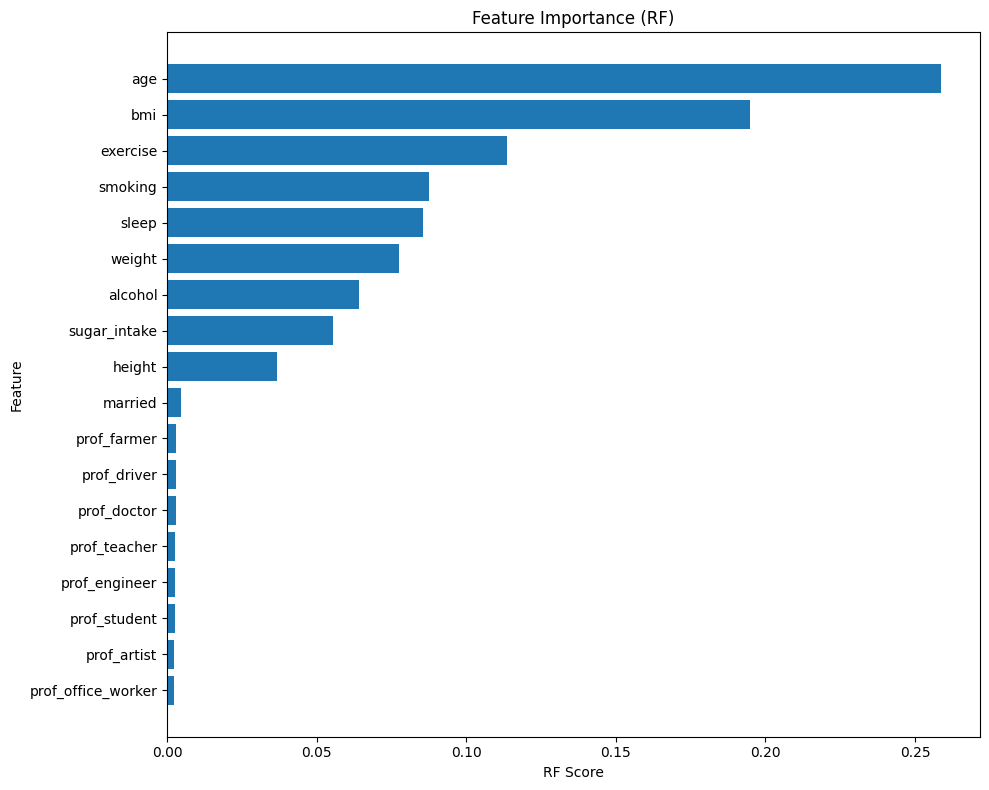

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # (重要!) 匯入 RF

# (假設 X_train_scaled_df 和 Y_train 依然存在於您的 Colab 記憶體中)

print("--- (A) 特徵選取 (5/5): RF-bag (Random Forest Importance) ---")

# --- 1. 取得特徵名稱 ---
feature_names = X_train_scaled_df.columns

# --- 2. 訓練一個基準隨機森林 (使用全部特徵) ---
print("正在訓練基準隨機森林模型...")
# (重要!) 必須使用 class_weight='balanced' 來獲得公平的重要性
rf_model_for_importance = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100 # (使用預設的 100 棵樹)
)
rf_model_for_importance.fit(X_train_scaled_df, Y_train)
print("訓練完成。")

# --- 3. 提取特徵重要性分數 ---
rf_importances = rf_model_for_importance.feature_importances_

# --- 4. 建立分數總表 (用於報告) ---
rf_scores_df = pd.DataFrame({
    'Feature': feature_names,
    'RF_Importance': rf_importances
})

# 根據重要性分數排序
rf_scores_df = rf_scores_df.sort_values(by='RF_Importance', ascending=False)

print("\n--- RF-bag (Random Forest) 特徵重要性 (由高至低) ---")
# 使用 .to_string() 來確保 18 個特徵全部被印出
print(rf_scores_df.to_string())
print("\n")

# ---  繪製長條圖 (Bar Chart) ---
import matplotlib.pyplot as plt

print("--- 正在繪製特徵分數長條圖 ---")

# (設定圖表大小，寬 10, 高 8，適合 18 個特徵)
plt.figure(figsize=(10, 8))

# (建立水平長條圖)
# y 軸是特徵名稱, width (寬度) 是分數
plt.barh(rf_scores_df['Feature'], rf_scores_df['RF_Importance'])

# (重要!) 反轉 Y 軸，讓分數最高的特徵顯示在最上面
plt.gca().invert_yaxis()

# (加上標題和標籤)
plt.title('Feature Importance (RF)')
plt.xlabel('RF Score')
plt.ylabel('Feature')

# (自動調整版面，避免 Y 軸的特徵名稱被裁切)
plt.tight_layout()

# (顯示圖表)
plt.show()

DT

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 rf_scores_df 是您上一步計算出的 RF 特徵重要性 DataFrame)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
dt_rf_results = [] # (新的結果 list)

# (重要!) 獲取 RF 重要性排序的特徵名稱列表
try:
    # 確保 rf_scores_df 存在且已排序
    rf_ranked_features = rf_scores_df['Feature'].tolist()
    print("--- 已成功獲取 RF 特徵重要性排名 ---")
except NameError:
    print("錯誤：找不到 'rf_scores_df' (RF 特徵重要性分數表)。請重新執行上一段計算 RF Importance 的程式碼。")
    # 如果 Colab 重連，需要重新計算 rf_scores_df

print("\n--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---")
print(f"--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---")
print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

# --- 2. 開始迴圈 ---

# (確保 rf_ranked_features 存在後才繼續)
if 'rf_ranked_features' in locals():
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 RF 排名列表中選取前 k 個特徵名稱
            selected_features = rf_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (RF Importance)"

        # --- B. 訓練模型 ---
        model_dt = DecisionTreeClassifier(
            random_state=42,
            class_weight='balanced'
        )

        model_dt.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_dt.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'Decision Tree',
            'Feature Set': 'RF Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        dt_rf_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_dt_rf_df = pd.DataFrame(dt_rf_results)

    print("\n--- 實驗結果：Decision Tree + RF Importance ---")
    print(results_dt_rf_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

else:
    print("無法執行實驗，因為缺少 'rf_scores_df'。")

--- 已成功獲取 RF 特徵重要性排名 ---

--- (B) 實驗 (1/6): 決策樹 (Decision Tree) ---
--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.03 秒)
已完成: K=10 (Top 10 Features (RF Importance)) (耗時: 0.04 秒)
已完成: K=9 (Top 9 Features (RF Importance)) (耗時: 0.03 秒)
已完成: K=8 (Top 8 Features (RF Importance)) (耗時: 0.07 秒)
已完成: K=7 (Top 7 Features (RF Importance)) (耗時: 0.05 秒)
已完成: K=6 (Top 6 Features (RF Importance)) (耗時: 0.04 秒)
已完成: K=5 (Top 5 Features (RF Importance)) (耗時: 0.03 秒)
已完成: K=4 (Top 4 Features (RF Importance)) (耗時: 0.03 秒)

--- 實驗結果：Decision Tree + RF Importance ---
        Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Decision Tree RF Importance 18   0.99800               0.99800            0.99800              0.99800     0.03408
Decision Tree RF Importance 10   0.99800               0.99800            0.99800              0.99800     0.03665
Decision Tree RF Importance  9   0.9

RF-bag

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier # (重要!) 使用 RF
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 rf_scores_df 是您計算出的 RF 特徵重要性 DataFrame)
# (假設 rf_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
rf_rf_results = [] # (新的結果 list)

# (檢查 rf_ranked_features 是否存在)
if 'rf_ranked_features' not in locals():
     print("錯誤：找不到 'rf_ranked_features' (RF 特徵重要性排名列表)。請重新執行計算 RF Importance 的程式碼。")
else:
    print("--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---")
    print(f"--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 RF 排名列表中選取前 k 個特徵名稱
            selected_features = rf_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (RF Importance)"

        # --- B. 訓練模型 (使用 RandomForest) ---
        model_rf = RandomForestClassifier(
            random_state=42,
            class_weight='balanced'
        )

        model_rf.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_rf.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'Random Forest',
            'Feature Set': 'RF Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        rf_rf_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_rf_rf_df = pd.DataFrame(rf_rf_results)

    print("\n--- 實驗結果：Random Forest + RF Importance ---")
    print(results_rf_rf_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 rf_ranked_features 不存在，結束程式)
if 'rf_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (2/6): 隨機森林 (Random Forest / RF-bag) ---
--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 1.00 秒)
已完成: K=10 (Top 10 Features (RF Importance)) (耗時: 0.86 秒)
已完成: K=9 (Top 9 Features (RF Importance)) (耗時: 0.83 秒)
已完成: K=8 (Top 8 Features (RF Importance)) (耗時: 0.64 秒)
已完成: K=7 (Top 7 Features (RF Importance)) (耗時: 0.95 秒)
已完成: K=6 (Top 6 Features (RF Importance)) (耗時: 1.20 秒)
已完成: K=5 (Top 5 Features (RF Importance)) (耗時: 1.32 秒)
已完成: K=4 (Top 4 Features (RF Importance)) (耗時: 1.94 秒)

--- 實驗結果：Random Forest + RF Importance ---
        Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
Random Forest RF Importance 18   0.99500               0.99500            0.99500              0.99500     1.00271
Random Forest RF Importance 10   0.99600               0.99600            0.99600              0.99600     0.85919
Random Forest RF Importance  9   0.99800            

RF-boosting(XGBOOST)

In [ ]:
# --- 0. 安裝 xgboost (如果已安裝，會自動跳過) ---
!pip install xgboost

import pandas as pd
import xgboost as xgb # 匯入 xgboost
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 rf_scores_df 是您計算出的 RF 特徵重要性 DataFrame)
# (假設 rf_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
xgb_rf_results = [] # (新的結果 list)

# (重要!) 計算不平衡權重
# 負類別 (0, 'high'): 3490
# 正類別 (1, 'low'): 1510
scale_pos_weight_value = 3490 / 1510
print(f"--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: {scale_pos_weight_value:.4f} ---")


# (檢查 rf_ranked_features 是否存在)
if 'rf_ranked_features' not in locals():
     print("錯誤：找不到 'rf_ranked_features' (RF 特徵重要性排名列表)。請重新執行計算 RF Importance 的程式碼。")
else:
    print("\n--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---")
    print(f"--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 RF 排名列表中選取前 k 個特徵名稱
            selected_features = rf_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (RF Importance)"

        # --- B. 訓練模型 (換成 XGBClassifier) ---
        model_xgb = xgb.XGBClassifier(
            random_state=42,          # 固定隨機種子
            scale_pos_weight=scale_pos_weight_value, # (重要!) 處理不平衡
            use_label_encoder=False,
            eval_metric='logloss'
        )

        model_xgb.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_xgb.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'XGBoost', # (更改模型名稱)
            'Feature Set': 'RF Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        xgb_rf_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_xgb_rf_df = pd.DataFrame(xgb_rf_results)

    print("\n--- 實驗結果：XGBoost + RF Importance ---")
    print(results_xgb_rf_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 rf_ranked_features 不存在，結束程式)
if 'rf_ranked_features' not in locals():
    print("無法執行實驗。")

--- 使用 'low' (1) 作為正類別，權重 (scale_pos_weight) 設為: 2.3113 ---

--- (B) 實驗 (3/6): XGBoost (Boosting / RF-boost) ---
--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---
--- 正在執行 8 次實驗... ---


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:19:59] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=18 (All Features (18)) (耗時: 0.56 秒)
已完成: K=10 (Top 10 Features (RF Importance)) (耗時: 0.17 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:20:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:20:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=9 (Top 9 Features (RF Importance)) (耗時: 0.21 秒)
已完成: K=8 (Top 8 Features (RF Importance)) (耗時: 0.15 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:20:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:20:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=7 (Top 7 Features (RF Importance)) (耗時: 0.20 秒)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:20:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


已完成: K=6 (Top 6 Features (RF Importance)) (耗時: 0.42 秒)
已完成: K=5 (Top 5 Features (RF Importance)) (耗時: 0.09 秒)
已完成: K=4 (Top 4 Features (RF Importance)) (耗時: 0.08 秒)

--- 實驗結果：XGBoost + RF Importance ---
  Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
XGBoost RF Importance 18   0.99900               0.99900            0.99900              0.99900     0.55509
XGBoost RF Importance 10   0.99900               0.99900            0.99900              0.99900     0.16855
XGBoost RF Importance  9   0.99900               0.99900            0.99900              0.99900     0.20813
XGBoost RF Importance  8   0.99900               0.99900            0.99900              0.99900     0.15497
XGBoost RF Importance  7   0.95300               0.95563            0.95300              0.95354     0.19983
XGBoost RF Importance  6   0.89300               0.89617            0.89300              0.89407     0.41794
XGBoost RF Importance  5   0.89800

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:20:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:20:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SVM

In [ ]:
import pandas as pd
from sklearn.svm import SVC # (重要!) 匯入 SVC
from sklearn.metrics import classification_report, accuracy_score
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 rf_scores_df 是您計算出的 RF 特徵重要性 DataFrame)
# (假設 rf_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
svm_rf_results = [] # (新的結果 list)

# (檢查 rf_ranked_features 是否存在)
if 'rf_ranked_features' not in locals():
     print("錯誤：找不到 'rf_ranked_features' (RF 特徵重要性排名列表)。請重新執行計算 RF Importance 的程式碼。")
else:
    print("--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---")
    print(f"--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗 (注意: SVM 速度較慢)... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run = X_train_scaled_df
            X_test_run = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 RF 排名列表中選取前 k 個特徵名稱
            selected_features = rf_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run = X_train_scaled_df[selected_features]
            X_test_run = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (RF Importance)"

        # --- B. 訓練模型 (換成 SVC) ---
        # (使用預設 C=1.0)
        model_svm = SVC(
            random_state=42,          # 固定隨機種子
            class_weight='balanced',   # (重要!) 處理不平衡
            C=10,
            gamma='scale'
        )

        model_svm.fit(X_train_run, Y_train)

        # --- C. 評估模型 ---
        Y_pred = model_svm.predict(X_test_run)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- D. 儲存結果 ---
        result_dict = {
            'Model': 'SVM', # (更改模型名稱)
            'Feature Set': 'RF Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        svm_rf_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_svm_rf_df = pd.DataFrame(svm_rf_results)

    print("\n--- 實驗結果：SVM + RF Importance ---")
    print(results_svm_rf_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 rf_ranked_features 不存在，結束程式)
if 'rf_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (4/6): SVM (Support Vector Machine) ---
--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---
--- 正在執行 8 次實驗 (注意: SVM 速度較慢)... ---
已完成: K=18 (All Features (18)) (耗時: 0.81 秒)
已完成: K=10 (Top 10 Features (RF Importance)) (耗時: 0.49 秒)
已完成: K=9 (Top 9 Features (RF Importance)) (耗時: 0.54 秒)
已完成: K=8 (Top 8 Features (RF Importance)) (耗時: 0.46 秒)
已完成: K=7 (Top 7 Features (RF Importance)) (耗時: 0.58 秒)
已完成: K=6 (Top 6 Features (RF Importance)) (耗時: 0.68 秒)
已完成: K=5 (Top 5 Features (RF Importance)) (耗時: 0.72 秒)
已完成: K=4 (Top 4 Features (RF Importance)) (耗時: 0.69 秒)

--- 實驗結果：SVM + RF Importance ---
Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  SVM RF Importance 18   0.88400               0.88867            0.88400              0.88547     0.81422
  SVM RF Importance 10   0.94800               0.95089            0.94800              0.94862     0.48963
  SVM RF Importance  9   0.95700               0.95927            0.9570

MLP

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time
import warnings
from sklearn.exceptions import ConvergenceWarning

# (忽略 MLP 可能的收斂警告)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 rf_scores_df 是您計算出的 RF 特徵重要性 DataFrame)
# (假設 rf_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
mlp_rf_results = [] # (新的結果 list)

# (檢查 rf_ranked_features 是否存在)
if 'rf_ranked_features' not in locals():
     print("錯誤：找不到 'rf_ranked_features' (RF 特徵重要性排名列表)。請重新執行計算 RF Importance 的程式碼。")
else:
    print("--- (B) 實驗 (5/6): MLP (Neural Network) ---")
    print(f"--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 RF 排名列表中選取前 k 個特徵名稱
            selected_features = rf_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (RF Importance)"

        # --- B. (重要!) 執行 SMOTE ---
        smote = SMOTE(random_state=42)
        X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

        # --- C. 訓練模型 (換成 MLPClassifier) ---
        # (使用預設 hidden_layer_sizes=(100,) )
        model_mlp = MLPClassifier(
            random_state=42,
            max_iter=500, # (確保收斂)
            hidden_layer_sizes=(50,50)
        )

        model_mlp.fit(X_train_resampled, Y_train_resampled)

        # --- D. 評估模型 ---
        Y_pred = model_mlp.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'MLP',
            'Feature Set': 'RF Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        mlp_rf_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_mlp_rf_df = pd.DataFrame(mlp_rf_results)

    print("\n--- 實驗結果：MLP + RF Importance ---")
    print(results_mlp_rf_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 rf_ranked_features 不存在，結束程式)
if 'rf_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (5/6): MLP (Neural Network) ---
--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 13.13 秒)
已完成: K=10 (Top 10 Features (RF Importance)) (耗時: 9.21 秒)
已完成: K=9 (Top 9 Features (RF Importance)) (耗時: 8.43 秒)
已完成: K=8 (Top 8 Features (RF Importance)) (耗時: 8.26 秒)
已完成: K=7 (Top 7 Features (RF Importance)) (耗時: 6.98 秒)
已完成: K=6 (Top 6 Features (RF Importance)) (耗時: 9.22 秒)
已完成: K=5 (Top 5 Features (RF Importance)) (耗時: 7.47 秒)
已完成: K=4 (Top 4 Features (RF Importance)) (耗時: 7.21 秒)

--- 實驗結果：MLP + RF Importance ---
Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  MLP RF Importance 18   0.92200               0.92146            0.92200              0.92162    13.13265
  MLP RF Importance 10   0.97100               0.97093            0.97100              0.97087     9.21238
  MLP RF Importance  9   0.96700               0.96712            0.96700              0.96672

KNN

In [ ]:
# --- 0. 安裝 imbalanced-learn (如果已安裝，會自動跳過) ---
!pip install imbalanced-learn

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # (重要!) 匯入 kNN
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE # (重要!) 匯入 SMOTE
import time

# (假設 X_train_scaled_df, Y_train, X_test_scaled_df, Y_test 是您之前的結果)
# (假設 rf_scores_df 是您計算出的 RF 特徵重要性 DataFrame)
# (假設 rf_ranked_features 列表也存在)

# --- 1. 準備實驗參數 ---
K_values = [18, 10, 9, 8, 7, 6, 5, 4]

# 準備一個新的 list
knn_rf_results = [] # (新的結果 list)

# (檢查 rf_ranked_features 是否存在)
if 'rf_ranked_features' not in locals():
     print("錯誤：找不到 'rf_ranked_features' (RF 特徵重要性排名列表)。請重新執行計算 RF Importance 的程式碼。")
else:
    print("--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---")
    print(f"--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---")
    print(f"--- 正在執行 {len(K_values)} 次實驗... ---")

    # --- 2. 開始迴圈 ---
    for k in K_values:

        start_time = time.time()

        # --- A. 準備資料 (手動選取 Top K) ---
        if k == 18:
            selected_features = feature_names # 使用全部特徵名稱
            X_train_run_k = X_train_scaled_df
            X_test_run_k = X_test_scaled_df
            feature_set_name = "All Features (18)"
        else:
            # 從 RF 排名列表中選取前 k 個特徵名稱
            selected_features = rf_ranked_features[:k]
            # 使用這些名稱來選取欄位
            X_train_run_k = X_train_scaled_df[selected_features]
            X_test_run_k = X_test_scaled_df[selected_features]
            feature_set_name = f"Top {k} Features (RF Importance)"

        # --- B. (重要!) 執行 SMOTE ---
        smote = SMOTE(random_state=42)
        X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_run_k, Y_train)

        # --- C. 訓練模型 (換成 KNeighborsClassifier) ---
        # 使用預設超參數 (n_neighbors=5, weights='uniform')
        model_knn = KNeighborsClassifier(
            n_neighbors=5,
            weights='distance'
        )

        model_knn.fit(X_train_resampled, Y_train_resampled)

        # --- D. 評估模型 ---
        Y_pred = model_knn.predict(X_test_run_k)
        report = classification_report(Y_test, Y_pred, output_dict=True)

        accuracy = accuracy_score(Y_test, Y_pred)
        precision = report['weighted avg']['precision']
        recall = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']

        end_time = time.time()

        # --- E. 儲存結果 ---
        result_dict = {
            'Model': 'kNN',
            'Feature Set': 'RF Importance', # (更改特徵選取法名稱)
            'K': k,
            'Accuracy': accuracy,
            'Precision (Weighted)': precision,
            'Recall (Weighted)': recall,
            'F1-Score (Weighted)': f1,
            'Time (sec)': time.time() - start_time
        }

        knn_rf_results.append(result_dict)
        print(f"已完成: K={k} ({feature_set_name}) (耗時: {time.time() - start_time:.2f} 秒)")

    # --- 3. 將 8 次結果轉換為 DataFrame ---

    results_knn_rf_df = pd.DataFrame(knn_rf_results)

    print("\n--- 實驗結果：kNN + RF Importance ---")
    print(results_knn_rf_df.sort_values(by='K', ascending=False).to_string(index=False, float_format="%.5f"))

# (如果 rf_ranked_features 不存在，結束程式)
if 'rf_ranked_features' not in locals():
    print("無法執行實驗。")

--- (B) 實驗 (6/6): kNN (k-Nearest Neighbors) ---
--- 特徵選取法 (5/5): RF-bag (Random Forest Importance) ---
--- 正在執行 8 次實驗... ---
已完成: K=18 (All Features (18)) (耗時: 0.10 秒)
已完成: K=10 (Top 10 Features (RF Importance)) (耗時: 0.16 秒)
已完成: K=9 (Top 9 Features (RF Importance)) (耗時: 0.13 秒)
已完成: K=8 (Top 8 Features (RF Importance)) (耗時: 0.12 秒)
已完成: K=7 (Top 7 Features (RF Importance)) (耗時: 0.10 秒)
已完成: K=6 (Top 6 Features (RF Importance)) (耗時: 0.08 秒)
已完成: K=5 (Top 5 Features (RF Importance)) (耗時: 0.08 秒)
已完成: K=4 (Top 4 Features (RF Importance)) (耗時: 0.06 秒)

--- 實驗結果：kNN + RF Importance ---
Model   Feature Set  K  Accuracy  Precision (Weighted)  Recall (Weighted)  F1-Score (Weighted)  Time (sec)
  kNN RF Importance 18   0.84300               0.86677            0.84300              0.84780     0.10474
  kNN RF Importance 10   0.92400               0.92969            0.92400              0.92524     0.16202
  kNN RF Importance  9   0.93800               0.94178            0.93800              0.9